In [70]:
# Import des biblioth√®ques essentielles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuration pour un meilleur affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Chargement du dataset
df = pd.read_csv('babyfoot_dataset.csv')

# Premi√®re vue d'ensemble
print("üéØ INFORMATIONS G√âN√âRALES SUR LE DATASET")
print("="*50)
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")
print("\nüìä Premi√®res lignes du dataset :")
df.head()


üéØ INFORMATIONS G√âN√âRALES SUR LE DATASET
Nombre de lignes : 100200
Nombre de colonnes : 35

üìä Premi√®res lignes du dataset :


game_id      game_date               location table_id table_condition  \
0  G015295  Feb 06st 2023          Ynov Toulouse      T05     beer stains   
1  G023800     24-03-2023  Cafeteria (1st floor)      T07            worn   
2  G023577     2025-01-13               Gym Hall      T26       scratched   
3  G020644    Nov 11 2025      Salle Polyvalente      T21            worn   
4  G011677      30 Sep 23     Campus - Cafeteria      T26   missing screw   

      ball_type                      music_playing          referee  \
0           NaN  Spotify: Queen - We Will Rock You         Paul Kim   
1           NaN                     Indie playlist              NaN   
2           NaN  Spotify: Queen - We Will Rock You     Lena Clement   
3     mini ball                            EDM mix  Isabella Girard   
4  trainer ball                         Oldies 80s              yes   

  game_duration final_score_red final_score_blue winner attendance_count  \
0         12.45               0              4.0   Blue                8   
1          8.57              10              7.0    red                5   
2          17.2               2              6.0   Bleu                3   
3          5.18               6              9.0   Blue        4 players   
4          6min               3             10.0   blue                2   

         season   recorded_by rating_raw player_id       player_name  \
0     2023/2024        camera          2     P0382      Juli3 Mor3au   
1  Season 24-25         admin          3     P0356  mohamed philippe   
2     2024/2025   Discord Bot       five     P0267         luc rossi   
3     2024/2025  player phone          5     P0208         Morgan R.   
4   2025 Season         GoPro          1     P0027         Cas3y Kim   

  player_canonical_name player_age player_role player_goals player_own_goals  \
0          Julie Moreau     twenty     defence            0                0   
1      Mohamed Philippe        NaN     defense            0                0   
2             Luc Rossi     21 yrs      ATTACK            2                0   
3          Morgan Rossi     21 yrs         def            0                0   
4             Casey Kim         26       attck            0                0   

  player_assists  player_saves possession_time mood    player_comment  \
0              4             3            9:36    1        ref biased   
1              2             2             NaN    üôÇ               NaN   
2              1             1         5.09min    2               NaN   
3              5             1             NaN    3  team spirit high   
4              5             8             177    üòÇ         rage quit   

  team_color is_substitute ping_ms          notes duplicate_flag misc  \
0        Red           yes     185        injured            NaN  NaN   
1       Blue           yes     NaN            NaN              0    -   
2          R            no     NaN  double booked              0  NaN   
3          B         maybe     NaN  double booked            NaN    -   
4        Red           yes     NaN            NaN            NaN  NaN   

            created_at  
0  2025-10-02T10:41:54  
1  2025-10-02T10:41:55  
2  2025-10-02T10:41:55  
3  2025-10-02T10:41:54  
4  2025-10-02T10:41:54

In [71]:
# Examen des types de donn√©es et des valeurs manquantes
print("\nüìã STRUCTURE DU DATASET")
print("="*50)
print("\nTypes de donn√©es par colonne :")
print(df.dtypes)

print("\nüîç ANALYSE DES VALEURS MANQUANTES")
print("="*50)
missing_summary = pd.DataFrame({
    'Colonne': df.columns,
    'Type': df.dtypes,
    'Valeurs_manquantes': df.isnull().sum(),
    'Pourcentage_manquant': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_summary = missing_summary[missing_summary['Valeurs_manquantes'] > 0].sort_values('Valeurs_manquantes', ascending=False)
print(missing_summary)

# Aper√ßu des valeurs uniques pour chaque colonne
print("\nüìä APER√áU DES VALEURS UNIQUES PAR COLONNE")
print("="*50)
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"\n{col}: {unique_count} valeurs uniques")
    if unique_count < 20:  # Si peu de valeurs uniques, on les affiche
        print(f"   Valeurs: {df[col].unique()[:10]}")  # Limite √† 10 pour la lisibilit√©


üìã STRUCTURE DU DATASET

Types de donn√©es par colonne :
game_id                  object
game_date                object
location                 object
table_id                 object
table_condition          object
ball_type                object
music_playing            object
referee                  object
game_duration            object
final_score_red          object
final_score_blue         object
winner                   object
attendance_count         object
season                   object
recorded_by              object
rating_raw               object
player_id                object
player_name              object
player_canonical_name    object
player_age               object
player_role              object
player_goals             object
player_own_goals         object
player_assists           object
player_saves              int64
possession_time          object
mood                     object
player_comment           object
team_color               object
is_substitut

In [72]:
print("\nüö® ANALYSE DES PROBL√àMES DE FORMAT")
print("="*50)

# 1. Analyse des formats de dates
print("\nüìÖ FORMATS DE DATES (game_date) :")
print("-"*30)
# √âchantillon des diff√©rents formats de dates
date_sample = df['game_date'].dropna().sample(min(20, len(df)))
for date in date_sample:
    print(f"  - {date}")

# 2. Analyse des formats de dur√©e
print("\n‚è±Ô∏è FORMATS DE DUR√âE (game_duration) :")
print("-"*30)
duration_formats = df['game_duration'].dropna().unique()[:15]
for duration in duration_formats:
    print(f"  - {duration}")

# 3. Analyse des couleurs d'√©quipe
print("\nüé® VARIANTES DE COULEURS D'√âQUIPE :")
print("-"*30)
print("Couleur gagnante (winner):", df['winner'].unique())
print("Couleur √©quipe (team_color):", df['team_color'].unique())

# 4. Analyse des valeurs bool√©ennes
print("\n‚úÖ FORMATS BOOL√âENS (is_substitute) :")
print("-"*30)
print(df['is_substitute'].unique())

# 5. Analyse des ratings
print("\n‚≠ê FORMATS DE RATING :")
print("-"*30)
print(df['rating_raw'].unique()[:10])

# 6. Probl√®mes d'encodage (emojis)
print("\nüòä COLONNES AVEC EMOJIS/CARACT√àRES SP√âCIAUX :")
print("-"*30)
print("Mood:", df['mood'].unique()[:10])


üö® ANALYSE DES PROBL√àMES DE FORMAT

üìÖ FORMATS DE DATES (game_date) :
------------------------------
  - 02/27/2025
  - 18-05-2023
  - 02/18/2024
  - 2024-02-05
  - 29-05-2023
  - 07/03/2025
  - 11/05/2023
  - 2023-11-12
  - 2024/06/03
  - Jan 14 2023
  - 27-03-2024
  - 2023/02/20
  - Feb 05 2023
  - 11/19/2025
  - 2023/10/14
  - 01 Aug 24
  - Dec 14 2024
  - 15/06/25
  - Apr 14 2023
  - 30-10-2023

‚è±Ô∏è FORMATS DE DUR√âE (game_duration) :
------------------------------
  - 12.45
  - 8.57
  - 17.2
  - 5.18
  - 6min
  - 5min
  - 18min
  - 00:08:11
  - 14.62
  - 16.11
  - 12min
  - 18.27
  - 7.28
  - 00:38:24
  - 15min

üé® VARIANTES DE COULEURS D'√âQUIPE :
------------------------------
Couleur gagnante (winner): ['Blue' 'red' 'Bleu' 'blue' 'Red' nan 'R' 'B' 'BLUE' 'Rouge' 'draw' 'TIE'
 'RED' 'tie' 'REDÔøΩ' 'RougeÔøΩ']
Couleur √©quipe (team_color): ['Red' 'Blue' 'R' 'B' 'üî¥' 'üîµ' 'blue' 'red' 'RedÔøΩ' 'BlueÔøΩ']

‚úÖ FORMATS BOOL√âENS (is_substitute) :
---------------------

In [73]:
print("\nüìù DOCUMENTATION COMPL√àTE DES PROBL√àMES IDENTIFI√âS")
print("="*70)

# Cr√©ons un dictionnaire structur√© des probl√®mes
problemes_identifies = {
    "game_date": {
        "probl√®me": "Formats multiples de dates",
        "exemples": ["DD/MM/YYYY", "YYYY-MM-DD", "MM/DD/YYYY", "MMM DDst YYYY", "DD MMM YY"],
        "solution_propos√©e": "Standardiser vers YYYY-MM-DD"
    },
    "game_duration": {
        "probl√®me": "Formats mixtes (d√©cimal, 'min', HH:MM:SS)",
        "exemples": ["12.45", "6min", "00:08:11"],
        "solution_propos√©e": "Convertir tout en minutes d√©cimales"
    },
    "winner/team_color": {
        "probl√®me": "Variations linguistiques et emojis",
        "exemples": ["Blue/Bleu/B/üîµ", "Red/Rouge/R/üî¥", "draw/TIE/tie"],
        "solution_propos√©e": "Standardiser vers 'Red', 'Blue', 'Draw'"
    },
    "is_substitute": {
        "probl√®me": "Texte au lieu de bool√©en",
        "exemples": ["yes", "no", "maybe", "noÔøΩ"],
        "solution_propos√©e": "yes‚ÜíTrue, no‚ÜíFalse, maybe/nan‚ÜíNone"
    },
    "rating_raw": {
        "probl√®me": "Formats mixtes (nombres, texte, emojis)",
        "exemples": ["2", "five", "üëç", "‚≠ê‚≠ê‚≠ê"],
        "solution_propos√©e": "Convertir tout en √©chelle num√©rique 1-5"
    },
    "mood": {
        "probl√®me": "M√©lange nombres/emojis/texte",
        "exemples": ["1", "üòÇ", "angry"],
        "solution_propos√©e": "Cr√©er une √©chelle num√©rique coh√©rente"
    },
    "caract√®res_corrompus": {
        "probl√®me": "Caract√®res mal encod√©s (ÔøΩ)",
        "exemples": ["REDÔøΩ", "noÔøΩ"],
        "solution_propos√©e": "Nettoyer les caract√®res corrompus"
    }
}

# Affichage structur√©
for colonne, details in problemes_identifies.items():
    print(f"\nüî∏ {colonne.upper()}")
    print(f"   Probl√®me: {details['probl√®me']}")
    print(f"   Exemples: {', '.join(str(e) for e in details['exemples'])}")
    print(f"   ‚Üí Solution: {details['solution_propos√©e']}")

# Analyse additionnelle des anomalies
print("\n\nüîç ANOMALIES SUPPL√âMENTAIRES D√âTECT√âES")
print("="*50)

# V√©rification des noms de joueurs avec caract√®res sp√©ciaux
print("\nüë§ Noms de joueurs avec caract√®res sp√©ciaux:")
special_names = df[df['player_name'].str.contains(r'[0-9]', na=False)]['player_name'].unique()[:5]
for name in special_names:
    print(f"  - {name}")

# V√©rification des √¢ges probl√©matiques
print("\nüéÇ Formats d'√¢ge probl√©matiques:")
age_samples = df['player_age'].dropna().unique()[:10]
for age in age_samples:
    print(f"  - {age}")


üìù DOCUMENTATION COMPL√àTE DES PROBL√àMES IDENTIFI√âS

üî∏ GAME_DATE
   Probl√®me: Formats multiples de dates
   Exemples: DD/MM/YYYY, YYYY-MM-DD, MM/DD/YYYY, MMM DDst YYYY, DD MMM YY
   ‚Üí Solution: Standardiser vers YYYY-MM-DD

üî∏ GAME_DURATION
   Probl√®me: Formats mixtes (d√©cimal, 'min', HH:MM:SS)
   Exemples: 12.45, 6min, 00:08:11
   ‚Üí Solution: Convertir tout en minutes d√©cimales

üî∏ WINNER/TEAM_COLOR
   Probl√®me: Variations linguistiques et emojis
   Exemples: Blue/Bleu/B/üîµ, Red/Rouge/R/üî¥, draw/TIE/tie
   ‚Üí Solution: Standardiser vers 'Red', 'Blue', 'Draw'

üî∏ IS_SUBSTITUTE
   Probl√®me: Texte au lieu de bool√©en
   Exemples: yes, no, maybe, noÔøΩ
   ‚Üí Solution: yes‚ÜíTrue, no‚ÜíFalse, maybe/nan‚ÜíNone

üî∏ RATING_RAW
   Probl√®me: Formats mixtes (nombres, texte, emojis)
   Exemples: 2, five, üëç, ‚≠ê‚≠ê‚≠ê
   ‚Üí Solution: Convertir tout en √©chelle num√©rique 1-5

üî∏ MOOD
   Probl√®me: M√©lange nombres/emojis/texte
   Exemples: 1, üòÇ, angry
   ‚

In [74]:
print("\nüßπ PHASE 2 : NETTOYAGE DES DONN√âES")
print("="*50)

# Cr√©er une copie pour le nettoyage
df_clean = df.copy()

# 1. NETTOYAGE DES DATES
print("\nüìÖ √âtape 1 : Standardisation des dates")
print("-"*40)

from dateutil import parser

def clean_date(date_str):
    """Convertit diff√©rents formats de dates vers un format standard"""
    if pd.isna(date_str):
        return None
    
    try:
        # Nettoyer les suffixes comme '1st', '2nd', etc.
        date_str = str(date_str).replace('st ', ' ').replace('nd ', ' ').replace('rd ', ' ').replace('th ', ' ')
        
        # Parser la date
        parsed_date = parser.parse(date_str, dayfirst=True)
        return parsed_date
    except:
        print(f"  ‚ö†Ô∏è Impossible de parser: {date_str}")
        return None

# Appliquer le nettoyage
df_clean['game_date_clean'] = df_clean['game_date'].apply(clean_date)

# V√©rification
print(f"Dates converties avec succ√®s: {df_clean['game_date_clean'].notna().sum()}/{len(df_clean)}")
print(f"Dates non converties: {df_clean['game_date_clean'].isna().sum()}")

# Afficher quelques exemples
print("\nExemples de conversion:")
sample_dates = df_clean[['game_date', 'game_date_clean']].dropna().sample(5)
for idx, row in sample_dates.iterrows():
    print(f"  {row['game_date']} ‚Üí {row['game_date_clean'].strftime('%Y-%m-%d')}")


üßπ PHASE 2 : NETTOYAGE DES DONN√âES

üìÖ √âtape 1 : Standardisation des dates
----------------------------------------
  ‚ö†Ô∏è Impossible de parser: 19 Oct 25ÔøΩ
Dates converties avec succ√®s: 100199/100200
Dates non converties: 1

Exemples de conversion:
  17/04/25 ‚Üí 2025-04-17
  2023-07-13 ‚Üí 2023-07-13
  19-11-2023 ‚Üí 2023-11-19
  02-07-2024 ‚Üí 2024-07-02
  30-09-2024 ‚Üí 2024-09-30


## Nettoyage de la duree des jeux

In [75]:
# 2. NETTOYAGE DES DUR√âES
print("\n\n‚è±Ô∏è √âtape 2 : Standardisation des dur√©es (en minutes)")
print("-"*40)

def clean_duration(duration_str):
    """Convertit diff√©rents formats de dur√©e en minutes d√©cimales"""
    if pd.isna(duration_str):
        return None
    
    duration_str = str(duration_str).strip()
    
    try:
        # Format HH:MM:SS
        if ':' in duration_str:
            parts = duration_str.split(':')
            if len(parts) == 3:
                hours, minutes, seconds = map(float, parts)
                return hours * 60 + minutes + seconds / 60
            elif len(parts) == 2:
                minutes, seconds = map(float, parts)
                return minutes + seconds / 60
        
        # Format avec 'min'
        elif 'min' in duration_str.lower():
            return float(duration_str.lower().replace('min', '').strip())
        
        # Format d√©cimal (assum√© en minutes)
        else:
            return float(duration_str)
    
    except:
        print(f"  ‚ö†Ô∏è Impossible de parser: {duration_str}")
        return None

# Appliquer le nettoyage
df_clean['game_duration_clean'] = df_clean['game_duration'].apply(clean_duration)

# V√©rification
print(f"Dur√©es converties: {df_clean['game_duration_clean'].notna().sum()}/{len(df_clean)}")

# Statistiques sur les dur√©es
print("\nStatistiques des dur√©es (en minutes):")
print(df_clean['game_duration_clean'].describe().round(2))

# Exemples de conversion
print("\nExemples de conversion:")
sample_durations = df_clean[['game_duration', 'game_duration_clean']].dropna().sample(5)
for idx, row in sample_durations.iterrows():
    print(f"  {row['game_duration']} ‚Üí {row['game_duration_clean']:.2f} minutes")



‚è±Ô∏è √âtape 2 : Standardisation des dur√©es (en minutes)
----------------------------------------
  ‚ö†Ô∏è Impossible de parser: 7.58ÔøΩ
Dur√©es converties: 100199/100200

Statistiques des dur√©es (en minutes):
count    100199.00
mean         17.50
std          12.33
min           5.00
25%           9.57
50%          14.16
75%          19.00
max          59.98
Name: game_duration_clean, dtype: float64

Exemples de conversion:
  12min ‚Üí 12.00 minutes
  00:58:01 ‚Üí 58.02 minutes
  00:28:02 ‚Üí 28.03 minutes
  19.0 ‚Üí 19.00 minutes
  7min ‚Üí 7.00 minutes


## nettoyage des couleurs d'√©quipe

In [76]:
# 3. NETTOYAGE DES COULEURS D'√âQUIPE
print("\n\nüé® √âtape 3 : Standardisation des couleurs")
print("-"*40)

def clean_color(color_str):
    """Standardise les couleurs vers Red, Blue ou Draw"""
    if pd.isna(color_str):
        return None
    
    color_str = str(color_str).strip().lower()
    
    # Supprimer les caract√®res corrompus
    color_str = color_str.replace('ÔøΩ', '')
    
    # Mapping des couleurs
    if color_str in ['red', 'rouge', 'r', 'üî¥']:
        return 'Red'
    elif color_str in ['blue', 'bleu', 'b', 'üîµ']:
        return 'Blue'
    elif color_str in ['draw', 'tie', '']:
        return 'Draw'
    else:
        
        return None

# Nettoyer winner et team_color
df_clean['winner_clean'] = df_clean['winner'].apply(clean_color)
df_clean['team_color_clean'] = df_clean['team_color'].apply(clean_color)

# V√©rification
print(f"\nR√©sultats du nettoyage:")
print(f"Winner - Valeurs uniques: {df_clean['winner_clean'].unique()}")
print(f"Team_color - Valeurs uniques: {df_clean['team_color_clean'].unique()}")

# 4. NETTOYAGE DES BOOL√âENS
print("\n\n‚úÖ √âtape 4 : Conversion des bool√©ens (is_substitute)")
print("-"*40)

def clean_boolean(bool_str):
    """Convertit yes/no/maybe en True/False/None"""
    if pd.isna(bool_str):
        return None
    
    bool_str = str(bool_str).strip().lower().replace('ÔøΩ', '')
    
    if bool_str in ['yes', '1', 'true']:
        return True
    elif bool_str in ['no', '0', 'false']:
        return False
    elif bool_str == 'maybe':
        return None  # Incertain
    else:
        print(f"  ‚ö†Ô∏è Valeur bool√©enne non reconnue: {bool_str}")
        return None

df_clean['is_substitute_clean'] = df_clean['is_substitute'].apply(clean_boolean)

# V√©rification
print(f"Valeurs apr√®s conversion:")
print(df_clean['is_substitute_clean'].value_counts(dropna=False))



üé® √âtape 3 : Standardisation des couleurs
----------------------------------------

R√©sultats du nettoyage:
Winner - Valeurs uniques: ['Blue' 'Red' None 'Draw']
Team_color - Valeurs uniques: ['Red' 'Blue']


‚úÖ √âtape 4 : Conversion des bool√©ens (is_substitute)
----------------------------------------
Valeurs apr√®s conversion:
is_substitute_clean
None     50131
True     25339
False    24730
Name: count, dtype: int64


##  nettoyage des ratings et des moods

In [77]:
# 5. NETTOYAGE DES RATINGS
print("\n\n‚≠ê √âtape 5 : Standardisation des ratings (√©chelle 1-5)")
print("-"*40)

def clean_rating(rating_str):
    """Convertit diff√©rents formats de rating vers √©chelle 1-5"""
    if pd.isna(rating_str):
        return None
    
    rating_str = str(rating_str).strip().lower()
    
    # Mapping des diff√©rents formats
    rating_map = {
        '1': 1, 'one': 1, '‚≠ê': 1, 'üò°': 1,
        '2': 2, 'two': 2, '‚≠ê‚≠ê': 2,
        '3': 3, 'three': 3, '‚≠ê‚≠ê‚≠ê': 3,
        '4': 4, 'four': 4, '‚≠ê‚≠ê‚≠ê‚≠ê': 4, 'üëç': 4,
        '5': 5, 'five': 5, '‚≠ê‚≠ê‚≠ê‚≠ê‚≠ê': 5,
        'üëç': 4,  # Pouce en l'air = bon = 4
    }
    
    if rating_str in rating_map:
        return rating_map[rating_str]
    else:
        # Tenter de parser comme nombre
        try:
            rating = int(rating_str)
            if 1 <= rating <= 5:
                return rating
        except:
            pass
        # print(f"  ‚ö†Ô∏è Rating non reconnu: {rating_str}")
        return None

df_clean['rating_clean'] = df_clean['rating_raw'].apply(clean_rating)

# V√©rification
print(f"Distribution des ratings nettoy√©s:")
print(df_clean['rating_clean'].value_counts().sort_index())

# 6. NETTOYAGE DES MOODS
print("\n\nüòä √âtape 6 : Conversion des moods (√©chelle 1-5)")
print("-"*40)

def clean_mood(mood_str):
    """Convertit moods en √©chelle num√©rique 1-5 (1=tr√®s n√©gatif, 5=tr√®s positif)"""
    if pd.isna(mood_str):
        return None
    
    mood_str = str(mood_str).strip().lower()
    
    # Mapping √©motionnel
    mood_map = {
        'üò°': 1, 'angry': 1, '1': 1,  # Tr√®s n√©gatif
        'üòî': 2, '2': 2,               # N√©gatif
        'üòê': 3, 'üôÇ': 3, '3': 3,      # Neutre
        'üòä': 4, 'happy': 4, '4': 4,   # Positif
        'üòÇ': 5, '5': 5                # Tr√®s positif
    }
    
    if mood_str in mood_map:
        return mood_map[mood_str]
    else:
        # Tenter de parser comme nombre
        try:
            mood = int(mood_str)
            if 1 <= mood <= 5:
                return mood
        except:
            pass
        print(f"  ‚ö†Ô∏è Mood non reconnu: {mood_str}")
        return None

df_clean['mood_clean'] = df_clean['mood'].apply(clean_mood)

print(f"Distribution des moods nettoy√©s:")
print(df_clean['mood_clean'].value_counts().sort_index())



‚≠ê √âtape 5 : Standardisation des ratings (√©chelle 1-5)
----------------------------------------
Distribution des ratings nettoy√©s:
rating_clean
1.0    18896
2.0     9147
3.0    17760
4.0    27330
5.0    18092
Name: count, dtype: int64


üòä √âtape 6 : Conversion des moods (√©chelle 1-5)
----------------------------------------
Distribution des moods nettoy√©s:
mood_clean
1.0    33580
2.0    11163
3.0    22020
4.0    11157
5.0    11050
Name: count, dtype: int64


## nettoyage des noms de joueurs et des √¢ges

In [78]:
# 7. NETTOYAGE DES NOMS DE JOUEURS
print("\n\nüë§ √âtape 7 : Nettoyage des noms de joueurs")
print("-"*40)

def clean_player_name(name):
    """Nettoie les noms de joueurs (supprime chiffres et normalise)"""
    if pd.isna(name):
        return None
    
    # Remplacer les chiffres par des lettres √©quivalentes
    replacements = {
        '3': 'e', '1': 'i', '0': 'o', '4': 'a', '5': 's'
    }
    
    clean_name = str(name)
    for old, new in replacements.items():
        clean_name = clean_name.replace(old, new)
    
    # Normaliser la casse (Pr√©nom Nom)
    clean_name = ' '.join(word.capitalize() for word in clean_name.split())
    
    return clean_name

df_clean['player_name'] = df_clean['player_name'].apply(clean_player_name)

# Afficher quelques exemples de nettoyage
print("Exemples de nettoyage des noms:")
name_changes = df_clean[df_clean['player_name'] != df_clean['player_name']][['player_name', 'player_name']].dropna().head(5)
for idx, row in name_changes.iterrows():
    print(f"  {row['player_name']} ‚Üí {row['player_name']}")

# 8. NETTOYAGE DES √ÇGES
print("\n\nüéÇ √âtape 8 : Conversion des √¢ges en num√©rique")
print("-"*40)

def clean_age(age_str):
    """Extrait l'√¢ge num√©rique depuis diff√©rents formats"""
    if pd.isna(age_str):
        return None
    
    age_str = str(age_str).strip()
    
    # Extraire les nombres
    import re
    numbers = re.findall(r'\d+', age_str)
    
    if numbers:
        age = int(numbers[0])
        # Validation de l'√¢ge (entre 10 et 80 ans)
        if 10 <= age <= 80:
            return age
        else:
            print(f"  ‚ö†Ô∏è √Çge suspect: {age} (depuis '{age_str}')")
            return None
    else:
        # Cas sp√©ciaux
        age_words = {
            'twenty': 20, 'thirty': 30, 'forty': 40,
            'vingt': 20, 'trente': 30, 'quarante': 40
        }
        for word, value in age_words.items():
            if word in age_str.lower():
                return value
        
        print(f"  ‚ö†Ô∏è Impossible d'extraire l'√¢ge: {age_str}")
        return None

df_clean['player_age_clean'] = df_clean['player_age'].apply(clean_age)

# Statistiques sur les √¢ges
print(f"\nStatistiques des √¢ges nettoy√©s:")
print(df_clean['player_age_clean'].describe().round(1))

print(f"\nDistribution des √¢ges:")
age_distribution = df_clean['player_age_clean'].value_counts().sort_index()
print(age_distribution.head(10))



üë§ √âtape 7 : Nettoyage des noms de joueurs
----------------------------------------
Exemples de nettoyage des noms:


üéÇ √âtape 8 : Conversion des √¢ges en num√©rique
----------------------------------------

Statistiques des √¢ges nettoy√©s:
count    60313.0
mean        23.8
std          6.9
min         16.0
25%         20.0
50%         21.0
75%         23.0
max         45.0
Name: player_age_clean, dtype: float64

Distribution des √¢ges:
player_age_clean
16.0      671
17.0      675
18.0      707
19.0      645
20.0    20766
21.0    20664
22.0      677
23.0      703
24.0      655
25.0      650
Name: count, dtype: int64


## nettoyage des derni√®res colonnes et cr√©ation des variables d√©riv√©es

In [79]:
# 9. CONVERSION DES SCORES EN NUM√âRIQUE
print("\n\n‚öΩ √âtape 9 : Conversion des scores en num√©rique")
print("-"*40)

# Convertir les scores en num√©rique
df_clean['final_score_red'] = pd.to_numeric(df_clean['final_score_red'], errors='coerce')
df_clean['final_score_blue'] = pd.to_numeric(df_clean['final_score_blue'], errors='coerce')

print(f"Scores rouges convertis: {df_clean['final_score_red'].notna().sum()}")
print(f"Scores bleus convertis: {df_clean['final_score_blue'].notna().sum()}")

# 10. NETTOYAGE DES TEMPS DE POSSESSION
print("\n\n‚è±Ô∏è √âtape 10 : Nettoyage des temps de possession")
print("-"*40)

def clean_possession_time(time_str):
    """Convertit le temps de possession en secondes"""
    if pd.isna(time_str):
        return None
    
    time_str = str(time_str).strip()
    
    try:
        # Format MM:SS
        if ':' in time_str:
            parts = time_str.split(':')
            if len(parts) == 2:
                minutes, seconds = map(float, parts)
                return minutes * 60 + seconds
        
        # Format avec 'min'
        elif 'min' in time_str.lower():
            minutes = float(time_str.lower().replace('min', '').strip())
            return minutes * 60
        
        # Juste un nombre (assum√© en secondes)
        else:
            return float(time_str)
    
    except:
        print(f"  ‚ö†Ô∏è Impossible de parser: {time_str}")
        return None

df_clean['possession_time_seconds'] = df_clean['possession_time'].apply(clean_possession_time)

# 11. CR√âATION DE VARIABLES D√âRIV√âES (VERSION CORRIG√âE)
print("\n\nüîß √âtape 11 : Cr√©ation de variables d√©riv√©es")
print("-"*40)

# Maintenant on peut calculer la marge de victoire
df_clean['victory_margin'] = abs(df_clean['final_score_red'] - df_clean['final_score_blue'])

# Total de buts dans le match
df_clean['total_goals'] = df_clean['final_score_red'] + df_clean['final_score_blue']

# Extraire composantes temporelles de game_date_clean
df_clean['game_year'] = df_clean['game_date_clean'].dt.year
df_clean['game_month'] = df_clean['game_date_clean'].dt.month
df_clean['game_day_of_week'] = df_clean['game_date_clean'].dt.dayofweek  # 0=Lundi, 6=Dimanche

# Pour l'heure, utilisons errors='coerce' pour g√©rer les caract√®res corrompus
try:
    df_clean['created_at_clean'] = pd.to_datetime(df_clean['created_at'], errors='coerce')
    df_clean['game_hour'] = df_clean['created_at_clean'].dt.hour
    print(f"  - Heures extraites: {df_clean['game_hour'].notna().sum()} valeurs")
except:
    print("  - ‚ö†Ô∏è Impossible d'extraire les heures depuis created_at")
    df_clean['game_hour'] = None

# Indicateur de match nul
df_clean['is_draw'] = df_clean['winner_clean'] == 'Draw'

# Performance offensive (buts par minute de jeu)
# D'abord convertir player_goals en num√©rique
df_clean['player_goals'] = pd.to_numeric(df_clean['player_goals'], errors='coerce')
df_clean['player_assists'] = pd.to_numeric(df_clean['player_assists'], errors='coerce')
df_clean['player_saves'] = pd.to_numeric(df_clean['player_saves'], errors='coerce')
df_clean['player_own_goals'] = pd.to_numeric(df_clean['player_own_goals'], errors='coerce')

df_clean['goals_per_minute'] = df_clean['player_goals'] / df_clean['game_duration_clean']
df_clean['goals_per_minute'] = df_clean['goals_per_minute'].replace([np.inf, -np.inf], np.nan)

# 12. R√âSUM√â FINAL DU NETTOYAGE
print("\n\nüìä R√âSUM√â FINAL DU NETTOYAGE")
print("="*50)

print("\nüîç Colonnes nettoy√©es:")
colonnes_nettoyees = {
    'game_date': 'game_date_clean',
    'game_duration': 'game_duration_clean', 
    'winner': 'winner_clean',
    'team_color': 'team_color_clean',
    'is_substitute': 'is_substitute_clean',
    'rating_raw': 'rating_clean',
    'mood': 'mood_clean',
    'player_name': 'player_name',
    'player_age': 'player_age_clean'
}

for original, clean in colonnes_nettoyees.items():
    original_count = df_clean[original].notna().sum()
    clean_count = df_clean[clean].notna().sum()
    if original_count > 0:
        taux = clean_count/original_count*100
        print(f"  {original}: {clean_count}/{original_count} ({taux:.1f}%)")

print("\nüìà Variables d√©riv√©es cr√©√©es:")
variables_derivees = ['victory_margin', 'total_goals', 'game_year', 'game_month', 
                     'game_day_of_week', 'is_draw', 'goals_per_minute']
for var in variables_derivees:
    if var in df_clean.columns:
        count = df_clean[var].notna().sum()
        print(f"  - {var}: {count} valeurs")

# Sauvegarder le dataset nettoy√©
df_clean.to_csv('babyfoot_dataset_clean.csv', index=False)
print(f"\n‚úÖ Dataset nettoy√© sauvegard√©!")
print(f"   Colonnes totales: {len(df_clean.columns)} (originales: {len(df.columns)})")



‚öΩ √âtape 9 : Conversion des scores en num√©rique
----------------------------------------
Scores rouges convertis: 95293
Scores bleus convertis: 95293


‚è±Ô∏è √âtape 10 : Nettoyage des temps de possession
----------------------------------------
  ‚ö†Ô∏è Impossible de parser: 7.97minÔøΩ


üîß √âtape 11 : Cr√©ation de variables d√©riv√©es
----------------------------------------
  - Heures extraites: 100198 valeurs


üìä R√âSUM√â FINAL DU NETTOYAGE

üîç Colonnes nettoy√©es:
  game_date: 100199/100200 (100.0%)
  game_duration: 100199/100200 (100.0%)
  winner: 95531/95531 (100.0%)
  team_color: 100200/100200 (100.0%)
  is_substitute: 50069/75024 (66.7%)
  rating_raw: 91225/100200 (91.0%)
  mood: 88970/88970 (100.0%)
  player_name: 100200/100200 (100.0%)
  player_age: 60313/60313 (100.0%)

üìà Variables d√©riv√©es cr√©√©es:
  - victory_margin: 95292 valeurs
  - total_goals: 95292 valeurs
  - game_year: 100199 valeurs
  - game_month: 100199 valeurs
  - game_day_of_week: 100199 vale

## Nettoyage des donnees manquantes et suppression des colonnes non importantes 

In [68]:
import pandas as pd
import numpy as np

# === 1. Chargement du dataset ===
df = pd.read_csv("babyfoot_dataset.csv")
print("\n=== Aper√ßu initial ===")
print(f"Shape: {df.shape}")
print(f"NaN total au d√©part: {df.isna().sum().sum()}")

# === 2. Suppression des doublons ===
df_clean = df.drop_duplicates()
print(f"\nDoublons supprim√©s : {len(df) - len(df_clean)}")

# === 3. Analyse des NaN par colonne ===
print("\n=== Analyse des NaN ===")
nan_summary = pd.DataFrame({
    'Colonne': df_clean.columns,
    'NaN_count': df_clean.isna().sum(),
    'NaN_percent': (df_clean.isna().sum() / len(df_clean) * 100).round(2)
})
nan_summary = nan_summary[nan_summary['NaN_count'] > 0].sort_values('NaN_percent', ascending=False)
print(nan_summary)

# === 4. Suppression des colonnes peu importantes avec trop de NaN ===
# Colonnes √† supprimer (> 50% NaN ou peu utiles pour l'analyse)
columns_to_drop = [
    'misc',           # Peu informatif
    'notes',          # Peu structur√©
    'ping_ms',        # Pas pertinent pour l'analyse
    'duplicate_flag', # Gestion interne
    'created_at',     # Version non nettoy√©e
    'player_canonical_name'  # Redondant avec player_name
]

# Ajouter les colonnes avec > 70% de NaN
for col in df_clean.columns:
    nan_pct = df_clean[col].isna().sum() / len(df_clean) * 100
    if nan_pct > 70 and col not in columns_to_drop:
        columns_to_drop.append(col)
        print(f"Colonne '{col}' ajout√©e √† la suppression ({nan_pct:.1f}% NaN)")

# Supprimer les colonnes
df_clean = df_clean.drop(columns=[col for col in columns_to_drop if col in df_clean.columns])
print(f"\n‚úÖ {len(columns_to_drop)} colonnes supprim√©es")

# === 5. Traitement intelligent des NaN restants ===

# 5.1 - Colonnes num√©riques de jeu (remplacer par 0)
game_numeric_cols = [
    'final_score_red', 'final_score_blue', 
    'player_goals', 'player_assists', 'player_saves', 'player_own_goals',
    'possession_time', 'victory_margin', 'total_goals'
]
for col in game_numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce').fillna(0)

# 5.2 - Colonnes de dur√©e (remplacer par m√©diane)
duration_cols = ['game_duration', 'possession_time_seconds']
for col in duration_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        median_val = df_clean[col].median()
        if pd.notna(median_val):
            df_clean[col] = df_clean[col].fillna(median_val)
        else:
            df_clean[col] = df_clean[col].fillna(10)  # Valeur par d√©faut

# 5.3 - √Çge des joueurs (remplacer par m√©diane ou moyenne)
if 'player_age' in df_clean.columns:
    df_clean['player_age'] = pd.to_numeric(df_clean['player_age'], errors='coerce')
    median_age = df_clean['player_age'].median()
    if pd.notna(median_age):
        df_clean['player_age'] = df_clean['player_age'].fillna(median_age)
    else:
        df_clean['player_age'] = df_clean['player_age'].fillna(25)  # √Çge par d√©faut

# 5.4 - Colonnes cat√©gorielles
categorical_replacements = {
    'winner': 'Unknown',
    'team_color': 'Unknown',
    'player_role': 'Unknown',
    'location': 'Unknown',
    'table_id': 'Unknown',
    'table_condition': 'Unknown',
    'ball_type': 'standard',
    'music_playing': 'None',
    'referee': 'No',
    'recorded_by': 'Unknown',
    'season': 'Unknown',
    'is_substitute': 'No',
    'mood': '3',  # Neutre
    'player_comment': 'No comment'
}

for col, default_val in categorical_replacements.items():
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(default_val)

# 5.5 - Colonnes de rating (remplacer par m√©diane ou 3)
if 'rating_raw' in df_clean.columns:
    # Convertir en num√©rique si possible
    df_clean['rating_numeric'] = pd.to_numeric(df_clean['rating_raw'], errors='coerce')
    median_rating = df_clean['rating_numeric'].median()
    if pd.notna(median_rating):
        df_clean['rating_numeric'] = df_clean['rating_numeric'].fillna(median_rating)
    else:
        df_clean['rating_numeric'] = df_clean['rating_numeric'].fillna(3)
    df_clean['rating_raw'] = df_clean['rating_raw'].fillna('3')

# 5.6 - Attendance count (remplacer par m√©diane)
if 'attendance_count' in df_clean.columns:
    df_clean['attendance_count'] = pd.to_numeric(df_clean['attendance_count'], errors='coerce')
    median_attendance = df_clean['attendance_count'].median()
    if pd.notna(median_attendance):
        df_clean['attendance_count'] = df_clean['attendance_count'].fillna(median_attendance)
    else:
        df_clean['attendance_count'] = df_clean['attendance_count'].fillna(4)  # Valeur typique

# === 6. V√©rification colonne par colonne ===
print("\n=== Traitement final des NaN restants ===")
remaining_nan = df_clean.isna().sum()
remaining_nan = remaining_nan[remaining_nan > 0]

for col in remaining_nan.index:
    nan_count = df_clean[col].isna().sum()
    print(f"\nColonne '{col}' : {nan_count} NaN restants")
    
    # D√©terminer le type de donn√©e
    if df_clean[col].dtype in ['float64', 'int64']:
        # Num√©rique : utiliser la m√©diane ou 0
        median_val = df_clean[col].median()
        if pd.notna(median_val):
            df_clean[col] = df_clean[col].fillna(median_val)
            print(f"  ‚Üí Remplac√© par m√©diane: {median_val:.2f}")
        else:
            df_clean[col] = df_clean[col].fillna(0)
            print(f"  ‚Üí Remplac√© par 0")
    else:
        # Cat√©goriel : utiliser 'Unknown' ou la valeur la plus fr√©quente
        mode_val = df_clean[col].mode()
        if len(mode_val) > 0:
            df_clean[col] = df_clean[col].fillna(mode_val[0])
            print(f"  ‚Üí Remplac√© par mode: {mode_val[0]}")
        else:
            df_clean[col] = df_clean[col].fillna('Unknown')
            print(f"  ‚Üí Remplac√© par 'Unknown'")

# === 7. V√©rification finale ===
print("\n=== V√âRIFICATION FINALE ===")
final_nan_count = df_clean.isna().sum().sum()
print(f"NaN restants : {final_nan_count}")

if final_nan_count > 0:
    print("\n‚ö†Ô∏è Colonnes avec NaN persistants:")
    print(df_clean.isna().sum()[df_clean.isna().sum() > 0])
else:
    print("\n‚úÖ SUCC√àS : Aucun NaN restant !")

# === 8. Sauvegarde ===
output_file = "babyfoot_dataset_final.csv"
df_clean.to_csv(output_file, index=False)
print(f"\n‚úÖ Fichier nettoy√© sauvegard√© : {output_file}")
print(f"   Shape finale : {df_clean.shape}")

# === 9. R√©sum√© des transformations ===
print("\n=== R√âSUM√â DES TRANSFORMATIONS ===")
print(f"Lignes : {len(df)} ‚Üí {len(df_clean)}")
print(f"Colonnes : {len(df.columns)} ‚Üí {len(df_clean.columns)}")
print(f"NaN total : {df.isna().sum().sum()} ‚Üí {df_clean.isna().sum().sum()}")


=== Aper√ßu initial ===
Shape: (100200, 35)
NaN total au d√©part: 414959

Doublons supprim√©s : 83

=== Analyse des NaN ===
                           Colonne  NaN_count  NaN_percent
misc                          misc      60085        60.01
referee                    referee      60034        59.96
ping_ms                    ping_ms      50137        50.08
player_age              player_age      39847        39.80
duplicate_flag      duplicate_flag      39832        39.79
notes                        notes      33364        33.33
is_substitute        is_substitute      25156        25.13
possession_time    possession_time      25029        25.00
ball_type                ball_type      22511        22.48
player_comment      player_comment      16574        16.55
mood                          mood      11218        11.20
attendance_count  attendance_count      11198        11.18
music_playing        music_playing      10061        10.05
final_score_blue  final_score_blue       4901    

In [80]:
df_clean.head()
df_clean['winner_clean'].unique()

array(['Blue', 'Red', None, 'Draw'], dtype=object)

## Analyses exploratoires


In [81]:
# PHASE 3 : ANALYSE EXPLORATOIRE DES DONN√âES (EDA)
print("üìä PHASE 3 : ANALYSE EXPLORATOIRE DES DONN√âES (EDA)")
print("="*60)

# Configuration des graphiques
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F7DC6F', '#BB8FCE']

# V√©rifier et cr√©er les colonnes d√©riv√©es si n√©cessaire
print("\nüîß Cr√©ation des variables d√©riv√©es...")

# Convertir les scores en num√©rique si ce n'est pas d√©j√† fait
df_clean['final_score_red'] = pd.to_numeric(df_clean['final_score_red'], errors='coerce').fillna(0)
df_clean['final_score_blue'] = pd.to_numeric(df_clean['final_score_blue'], errors='coerce').fillna(0)

# Cr√©er les colonnes d√©riv√©es
if 'total_goals' not in df_clean.columns:
    df_clean['total_goals'] = df_clean['final_score_red'] + df_clean['final_score_blue']
    print("‚úì Colonne 'total_goals' cr√©√©e")

if 'victory_margin' not in df_clean.columns:
    df_clean['victory_margin'] = abs(df_clean['final_score_red'] - df_clean['final_score_blue'])
    print("‚úì Colonne 'victory_margin' cr√©√©e")

# Nettoyer la colonne winner si n√©cessaire
if 'winner_clean' not in df_clean.columns:
    if 'winner' in df_clean.columns:
        df_clean['winner_clean'] = df_clean['winner'].str.strip().str.title()
        # Standardiser les valeurs
        df_clean['winner_clean'] = df_clean['winner_clean'].replace({
            'Rouge': 'Red', 'Bleu': 'Blue', 'Tie': 'Draw', 
            'RED': 'Red', 'BLUE': 'Blue', 'TIE': 'Draw'
        })
    else:
        # Cr√©er winner_clean bas√© sur les scores
        df_clean['winner_clean'] = 'Unknown'
        df_clean.loc[df_clean['final_score_red'] > df_clean['final_score_blue'], 'winner_clean'] = 'Red'
        df_clean.loc[df_clean['final_score_red'] < df_clean['final_score_blue'], 'winner_clean'] = 'Blue'
        df_clean.loc[df_clean['final_score_red'] == df_clean['final_score_blue'], 'winner_clean'] = 'Draw'
    print("‚úì Colonne 'winner_clean' cr√©√©e")

# 1. ANALYSE UNIVARI√âE - DISTRIBUTION DES SCORES
print("\n\nüéØ 1. Distribution des scores")
print("-"*40)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution des scores par √©quipe
ax1 = axes[0, 0]
df_clean['final_score_red'].hist(bins=20, alpha=0.7, color='#FF6B6B', ax=ax1, label='Rouge')
df_clean['final_score_blue'].hist(bins=20, alpha=0.7, color='#4ECDC4', ax=ax1, label='Bleu')
ax1.set_xlabel('Score')
ax1.set_ylabel('Fr√©quence')
ax1.set_title('Distribution des scores par √©quipe')
ax1.legend()

# Distribution du total de buts
ax2 = axes[0, 1]
df_clean['total_goals'].hist(bins=20, color='#45B7D1', ax=ax2)
ax2.set_xlabel('Total de buts dans le match')
ax2.set_ylabel('Fr√©quence')
ax2.set_title('Distribution du nombre total de buts par match')

# Distribution des marges de victoire
ax3 = axes[1, 0]
df_clean['victory_margin'].hist(bins=15, color='#F7DC6F', ax=ax3)
ax3.set_xlabel('Marge de victoire')
ax3.set_ylabel('Fr√©quence')
ax3.set_title('Distribution des marges de victoire')

# R√©partition des victoires
ax4 = axes[1, 1]
winner_counts = df_clean['winner_clean'].value_counts()
if len(winner_counts) > 0:
    # Adapter les couleurs selon les valeurs pr√©sentes
    pie_colors = []
    for winner in winner_counts.index:
        if winner in ['Red', 'Rouge']:
            pie_colors.append('#FF6B6B')
        elif winner in ['Blue', 'Bleu']:
            pie_colors.append('#4ECDC4')
        elif winner in ['Draw', 'Tie']:
            pie_colors.append('#F7DC6F')
        else:
            pie_colors.append('#BB8FCE')
    
    ax4.pie(winner_counts.values, labels=winner_counts.index, autopct='%1.1f%%', colors=pie_colors)
    ax4.set_title('R√©partition des victoires par √©quipe')
else:
    ax4.text(0.5, 0.5, 'Pas de donn√©es de victoire disponibles', 
             ha='center', va='center', transform=ax4.transAxes)

plt.tight_layout()
plt.show()

# Statistiques sur les scores
print("\nStatistiques des scores:")
print(f"Score moyen Rouge: {df_clean['final_score_red'].mean():.2f}")
print(f"Score moyen Bleu: {df_clean['final_score_blue'].mean():.2f}")
print(f"Total de buts moyen par match: {df_clean['total_goals'].mean():.2f}")
print(f"Marge de victoire moyenne: {df_clean['victory_margin'].mean():.2f}")

# Afficher les colonnes disponibles pour r√©f√©rence
print("\nüìã Colonnes disponibles dans le dataset:")
print(df_clean.columns.tolist())

üìä PHASE 3 : ANALYSE EXPLORATOIRE DES DONN√âES (EDA)

üîß Cr√©ation des variables d√©riv√©es...


üéØ 1. Distribution des scores
----------------------------------------



Statistiques des scores:
Score moyen Rouge: 4.76
Score moyen Bleu: 4.76
Total de buts moyen par match: 10.01
Marge de victoire moyenne: 3.65

üìã Colonnes disponibles dans le dataset:
['game_id', 'game_date', 'location', 'table_id', 'table_condition', 'ball_type', 'music_playing', 'referee', 'game_duration', 'final_score_red', 'final_score_blue', 'winner', 'attendance_count', 'season', 'recorded_by', 'rating_raw', 'player_id', 'player_name', 'player_canonical_name', 'player_age', 'player_role', 'player_goals', 'player_own_goals', 'player_assists', 'player_saves', 'possession_time', 'mood', 'player_comment', 'team_color', 'is_substitute', 'ping_ms', 'notes', 'duplicate_flag', 'misc', 'created_at', 'game_date_clean', 'game_duration_clean', 'winner_clean', 'team_color_clean', 'is_substitute_clean', 'rating_clean', 'mood_clean', 'player_age_clean', 'possession_time_seconds', 'victory_margin', 'total_goals', 'game_year', 'game_month', 'game_day_of_week', 'created_at_clean', 'game_hour', '

## Analyse temporelle

In [82]:
# 2. ANALYSE TEMPORELLE (VERSION CORRIG√âE)
print("\n\nüìÖ 2. Analyse temporelle de l'utilisation")
print("-"*40)

# V√©rifier et cr√©er les colonnes temporelles si n√©cessaire
print("üîß Cr√©ation des variables temporelles...")

# Chercher la colonne de date
date_column = None
for col in ['game_date_clean', 'game_date', 'date']:
    if col in df_clean.columns:
        date_column = col
        break

if date_column:
    # Convertir en datetime si ce n'est pas d√©j√† fait
    df_clean[date_column] = pd.to_datetime(df_clean[date_column], errors='coerce')
    
    # Cr√©er les colonnes temporelles
    if 'game_month' not in df_clean.columns:
        df_clean['game_month'] = df_clean[date_column].dt.month
        print("‚úì Colonne 'game_month' cr√©√©e")
    
    if 'game_day_of_week' not in df_clean.columns:
        df_clean['game_day_of_week'] = df_clean[date_column].dt.dayofweek
        print("‚úì Colonne 'game_day_of_week' cr√©√©e")
    
    if 'game_year' not in df_clean.columns:
        df_clean['game_year'] = df_clean[date_column].dt.year
        print("‚úì Colonne 'game_year' cr√©√©e")
    
    # Pour l'heure, chercher dans created_at si game_hour n'existe pas
    if 'game_hour' not in df_clean.columns:
        if 'created_at' in df_clean.columns:
            df_clean['created_at_clean'] = pd.to_datetime(df_clean['created_at'], errors='coerce')
            df_clean['game_hour'] = df_clean['created_at_clean'].dt.hour
            print("‚úì Colonne 'game_hour' cr√©√©e depuis 'created_at'")
        else:
            print("‚ö†Ô∏è Pas de colonne horaire disponible")
else:
    print("‚ö†Ô∏è Aucune colonne de date trouv√©e dans le dataset")

# Cr√©er les graphiques seulement si les donn√©es existent
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graphique 1 : √âvolution par mois
ax1 = axes[0, 0]
if 'game_month' in df_clean.columns and df_clean['game_month'].notna().sum() > 0:
    monthly_games = df_clean.groupby('game_month')['game_id'].nunique()
    monthly_games.plot(kind='bar', ax=ax1, color='#45B7D1')
    ax1.set_xlabel('Mois')
    ax1.set_ylabel('Nombre de matchs')
    ax1.set_title('Nombre de matchs par mois')
    months_labels = ['Jan', 'F√©v', 'Mar', 'Avr', 'Mai', 'Jun', 'Jul', 'Ao√ª', 'Sep', 'Oct', 'Nov', 'D√©c']
    ax1.set_xticklabels([months_labels[int(m)-1] for m in monthly_games.index])
else:
    ax1.text(0.5, 0.5, 'Donn√©es mensuelles non disponibles', 
             ha='center', va='center', transform=ax1.transAxes)
    ax1.set_xticks([])
    ax1.set_yticks([])

# Graphique 2 : R√©partition par jour de la semaine
ax2 = axes[0, 1]
if 'game_day_of_week' in df_clean.columns and df_clean['game_day_of_week'].notna().sum() > 0:
    daily_games = df_clean.groupby('game_day_of_week')['game_id'].nunique()
    days_labels = ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
    daily_games.plot(kind='bar', ax=ax2, color='#F7DC6F')
    ax2.set_xlabel('Jour de la semaine')
    ax2.set_ylabel('Nombre de matchs')
    ax2.set_title('Nombre de matchs par jour de la semaine')
    ax2.set_xticklabels([days_labels[int(d)] for d in daily_games.index], rotation=0)
else:
    ax2.text(0.5, 0.5, 'Donn√©es journali√®res non disponibles', 
             ha='center', va='center', transform=ax2.transAxes)
    ax2.set_xticks([])
    ax2.set_yticks([])

# Graphique 3 : Distribution des heures de jeu
ax3 = axes[1, 0]
if 'game_hour' in df_clean.columns and df_clean['game_hour'].notna().sum() > 0:
    hourly_games = df_clean.groupby('game_hour')['game_id'].nunique()
    hourly_games.plot(kind='line', ax=ax3, color='#BB8FCE', marker='o')
    ax3.set_xlabel('Heure de la journ√©e')
    ax3.set_ylabel('Nombre de matchs')
    ax3.set_title('R√©partition des matchs par heure')
    ax3.set_xticks(range(0, 24, 2))
else:
    ax3.text(0.5, 0.5, 'Pas de donn√©es horaires disponibles', 
             ha='center', va='center', transform=ax3.transAxes)
    ax3.set_xticks([])
    ax3.set_yticks([])

# Graphique 4 : √âvolution par ann√©e
ax4 = axes[1, 1]
if 'game_year' in df_clean.columns and df_clean['game_year'].notna().sum() > 0:
    yearly_games = df_clean.groupby('game_year')['game_id'].nunique()
    yearly_games.plot(kind='bar', ax=ax4, color='#FF6B6B')
    ax4.set_xlabel('Ann√©e')
    ax4.set_ylabel('Nombre de matchs')
    ax4.set_title('√âvolution du nombre de matchs par ann√©e')
else:
    ax4.text(0.5, 0.5, 'Donn√©es annuelles non disponibles', 
             ha='center', va='center', transform=ax4.transAxes)
    ax4.set_xticks([])
    ax4.set_yticks([])

plt.tight_layout()
plt.show()

# Statistiques temporelles (avec v√©rifications)
print("\nüìä Statistiques temporelles:")

if 'game_month' in df_clean.columns and len(monthly_games) > 0:
    mois_max = int(monthly_games.idxmax())
    months_names = ['Janvier', 'F√©vrier', 'Mars', 'Avril', 'Mai', 'Juin', 
                    'Juillet', 'Ao√ªt', 'Septembre', 'Octobre', 'Novembre', 'D√©cembre']
    print(f"Mois le plus actif: {months_names[mois_max-1]} ({monthly_games.max()} matchs)")
else:
    print("Donn√©es mensuelles non disponibles")

if 'game_day_of_week' in df_clean.columns and len(daily_games) > 0:
    jour_max_idx = int(daily_games.idxmax())
    days_labels = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
    print(f"Jour de la semaine le plus actif: {days_labels[jour_max_idx]} ({daily_games.max()} matchs)")
else:
    print("Donn√©es journali√®res non disponibles")

if 'game_hour' in df_clean.columns and df_clean['game_hour'].notna().sum() > 0:
    print(f"Heure de pointe: {int(hourly_games.idxmax())}h ({hourly_games.max()} matchs)")
else:
    print("Donn√©es horaires non disponibles")

# Debug : afficher les colonnes temporelles disponibles
print("\nüìã Colonnes temporelles disponibles:")
temporal_cols = ['game_date', 'game_date_clean', 'game_month', 'game_day_of_week', 
                 'game_hour', 'game_year', 'created_at']
for col in temporal_cols:
    if col in df_clean.columns:
        print(f"  ‚úì {col} (valeurs non-nulles: {df_clean[col].notna().sum()})")



üìÖ 2. Analyse temporelle de l'utilisation
----------------------------------------
üîß Cr√©ation des variables temporelles...



üìä Statistiques temporelles:
Mois le plus actif: Octobre (2180 matchs)
Jour de la semaine le plus actif: Vendredi (3657 matchs)
Heure de pointe: 10h (25002 matchs)

üìã Colonnes temporelles disponibles:
  ‚úì game_date (valeurs non-nulles: 100200)
  ‚úì game_date_clean (valeurs non-nulles: 100199)
  ‚úì game_month (valeurs non-nulles: 100199)
  ‚úì game_day_of_week (valeurs non-nulles: 100199)
  ‚úì game_hour (valeurs non-nulles: 100198)
  ‚úì game_year (valeurs non-nulles: 100199)
  ‚úì created_at (valeurs non-nulles: 100200)


## Analye des performances des joueurs



‚öΩ 3. Analyse des performances des joueurs
----------------------------------------
Colonne de dur√©e utilis√©e: game_duration_clean

üèÜ TOP 10 DES BUTEURS
----------------------------------------


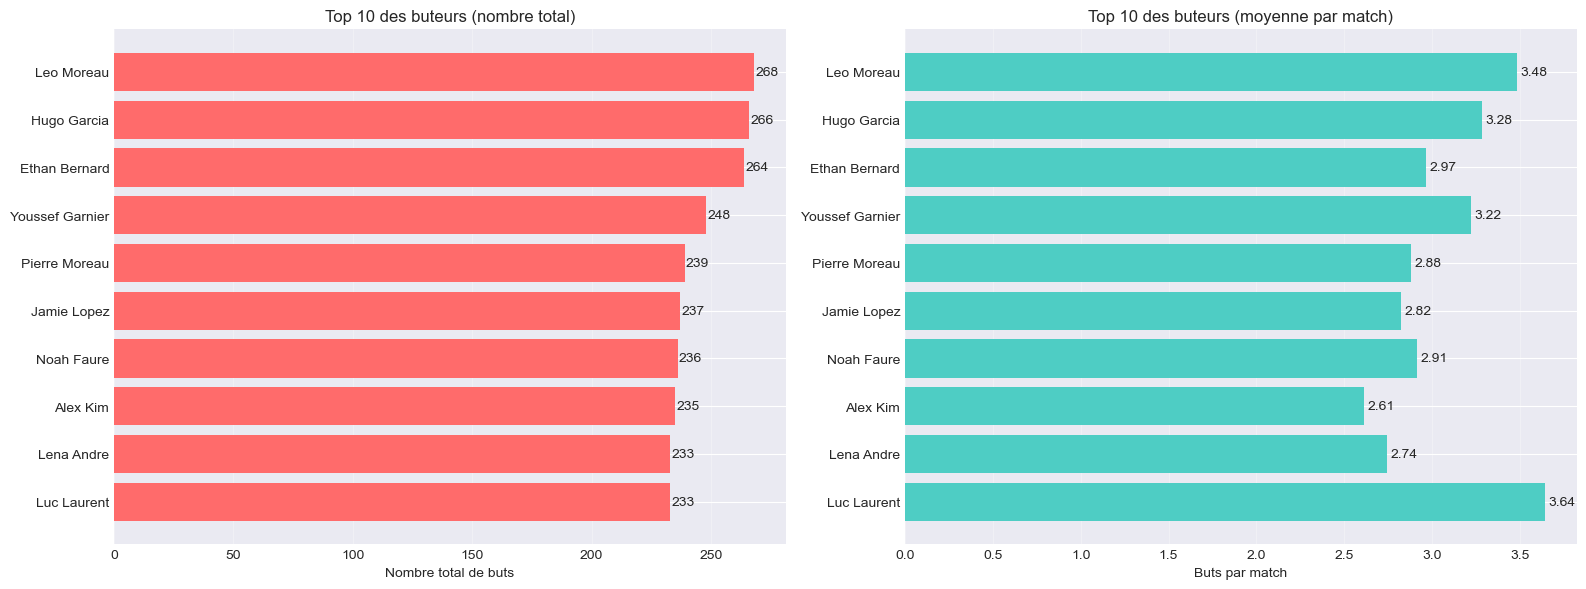


D√©tail du Top 10 des buteurs:
    player_name  matches_played  total_goals  goals_per_match  goals_per_90min
     Leo Moreau              77        268.0             3.48            17.69
    Hugo Garcia              81        266.0             3.28            17.33
  Ethan Bernard              89        264.0             2.97            15.64
Youssef Garnier              77        248.0             3.22            16.83
  Pierre Moreau              83        239.0             2.88            14.92
    Jamie Lopez              84        237.0             2.82            14.75
     Noah Faure              81        236.0             2.91            15.50
       Alex Kim              90        235.0             2.61            16.46
     Lena Andre              85        233.0             2.74            13.98
    Luc Laurent              64        233.0             3.64            18.23

üìã Colonnes disponibles pour l'analyse des joueurs:
  ‚úì player_id (100200 valeurs non-nulles)


In [83]:
# 3. ANALYSE DES JOUEURS ET PERFORMANCES
print("\n\n‚öΩ 3. Analyse des performances des joueurs")
print("-"*40)

# V√©rifier quelle colonne de dur√©e est disponible
duration_col = None
for col in ['game_duration_clean', 'game_duration', 'duration']:
    if col in df_clean.columns:
        duration_col = col
        break

print(f"Colonne de dur√©e utilis√©e: {duration_col if duration_col else 'Aucune'}")

# Pr√©paration des colonnes pour l'agr√©gation
agg_dict = {
    'game_id': 'count',  # Nombre de matchs jou√©s
    'player_goals': 'sum',
    'player_assists': 'sum',
    'player_saves': 'sum',
    'player_own_goals': 'sum'
}

# Ajouter la dur√©e si disponible
if duration_col:
    agg_dict[duration_col] = 'sum'

# Convertir les colonnes num√©riques si n√©cessaire
numeric_cols = ['player_goals', 'player_assists', 'player_saves', 'player_own_goals']
for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce').fillna(0)

# Agr√©gation par joueur
if 'player_name' in df_clean.columns:
    groupby_cols = ['player_id', 'player_name']
else:
    groupby_cols = ['player_id']

player_stats = df_clean.groupby(groupby_cols).agg(agg_dict).reset_index()

# Renommer les colonnes
new_cols = groupby_cols.copy()
new_cols.extend(['matches_played', 'total_goals', 'total_assists', 'total_saves', 'total_own_goals'])
if duration_col:
    new_cols.append('total_minutes')

player_stats.columns = new_cols

# Si pas de colonne player_name, la cr√©er
if 'player_name' not in player_stats.columns:
    player_stats['player_name'] = player_stats['player_id']

# Calculer des m√©triques d√©riv√©es
player_stats['goals_per_match'] = player_stats['total_goals'] / player_stats['matches_played']
player_stats['goals_per_match'] = player_stats['goals_per_match'].fillna(0)

# Calcul goals per 90min seulement si on a la dur√©e
if 'total_minutes' in player_stats.columns:
    # √âviter division par z√©ro
    player_stats['goals_per_90min'] = player_stats.apply(
        lambda x: (x['total_goals'] / x['total_minutes']) * 90 if x['total_minutes'] > 0 else 0, 
        axis=1
    )
else:
    player_stats['goals_per_90min'] = 0  # Valeur par d√©faut

# Nettoyer les infinis et NaN
player_stats = player_stats.replace([np.inf, -np.inf], 0)
player_stats = player_stats.fillna(0)

# TOP 10 DES BUTEURS
print("\nüèÜ TOP 10 DES BUTEURS")
print("-"*40)

top_scorers = player_stats.nlargest(10, 'total_goals')

# S'assurer qu'on a au moins quelques buteurs
if len(top_scorers) > 0:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Graphique 1: Total de buts
    ax1.barh(top_scorers['player_name'][::-1], top_scorers['total_goals'][::-1], color='#FF6B6B')
    ax1.set_xlabel('Nombre total de buts')
    ax1.set_title('Top 10 des buteurs (nombre total)')
    ax1.grid(True, alpha=0.3, axis='x')
    
    # Ajouter les valeurs sur les barres
    for i, (name, goals) in enumerate(zip(top_scorers['player_name'][::-1], top_scorers['total_goals'][::-1])):
        ax1.text(goals + 0.5, i, f'{int(goals)}', va='center')
    
    # Graphique 2: Buts par match
    ax2.barh(top_scorers['player_name'][::-1], top_scorers['goals_per_match'][::-1], color='#4ECDC4')
    ax2.set_xlabel('Buts par match')
    ax2.set_title('Top 10 des buteurs (moyenne par match)')
    ax2.grid(True, alpha=0.3, axis='x')
    
    # Ajouter les valeurs sur les barres
    for i, (name, avg) in enumerate(zip(top_scorers['player_name'][::-1], top_scorers['goals_per_match'][::-1])):
        ax2.text(avg + 0.02, i, f'{avg:.2f}', va='center')
    
    plt.tight_layout()
    plt.show()
    
    # Afficher le tableau d√©taill√©
    print("\nD√©tail du Top 10 des buteurs:")
    
    # Pr√©parer les colonnes √† afficher
    display_cols = ['player_name', 'matches_played', 'total_goals', 'goals_per_match']
    if 'goals_per_90min' in player_stats.columns and player_stats['goals_per_90min'].sum() > 0:
        display_cols.append('goals_per_90min')
    
    # Formater l'affichage
    top_scorers_display = top_scorers[display_cols].copy()
    top_scorers_display['goals_per_match'] = top_scorers_display['goals_per_match'].round(2)
    if 'goals_per_90min' in top_scorers_display.columns:
        top_scorers_display['goals_per_90min'] = top_scorers_display['goals_per_90min'].round(2)
    
    print(top_scorers_display.to_string(index=False))
else:
    print("‚ö†Ô∏è Aucune donn√©e de buteur disponible")

# Debug : afficher les colonnes disponibles
print("\nüìã Colonnes disponibles pour l'analyse des joueurs:")
relevant_cols = ['player_id', 'player_name', 'player_goals', 'player_assists', 
                 'player_saves', 'game_duration_clean', 'game_duration']
for col in relevant_cols:
    if col in df_clean.columns:
        non_null = df_clean[col].notna().sum()
        print(f"  ‚úì {col} ({non_null} valeurs non-nulles)")

## Analyse des defenseurs



üõ°Ô∏è 4. Analyse des meilleurs d√©fenseurs
----------------------------------------
Nombre de lignes de d√©fenseurs trouv√©es: 57358


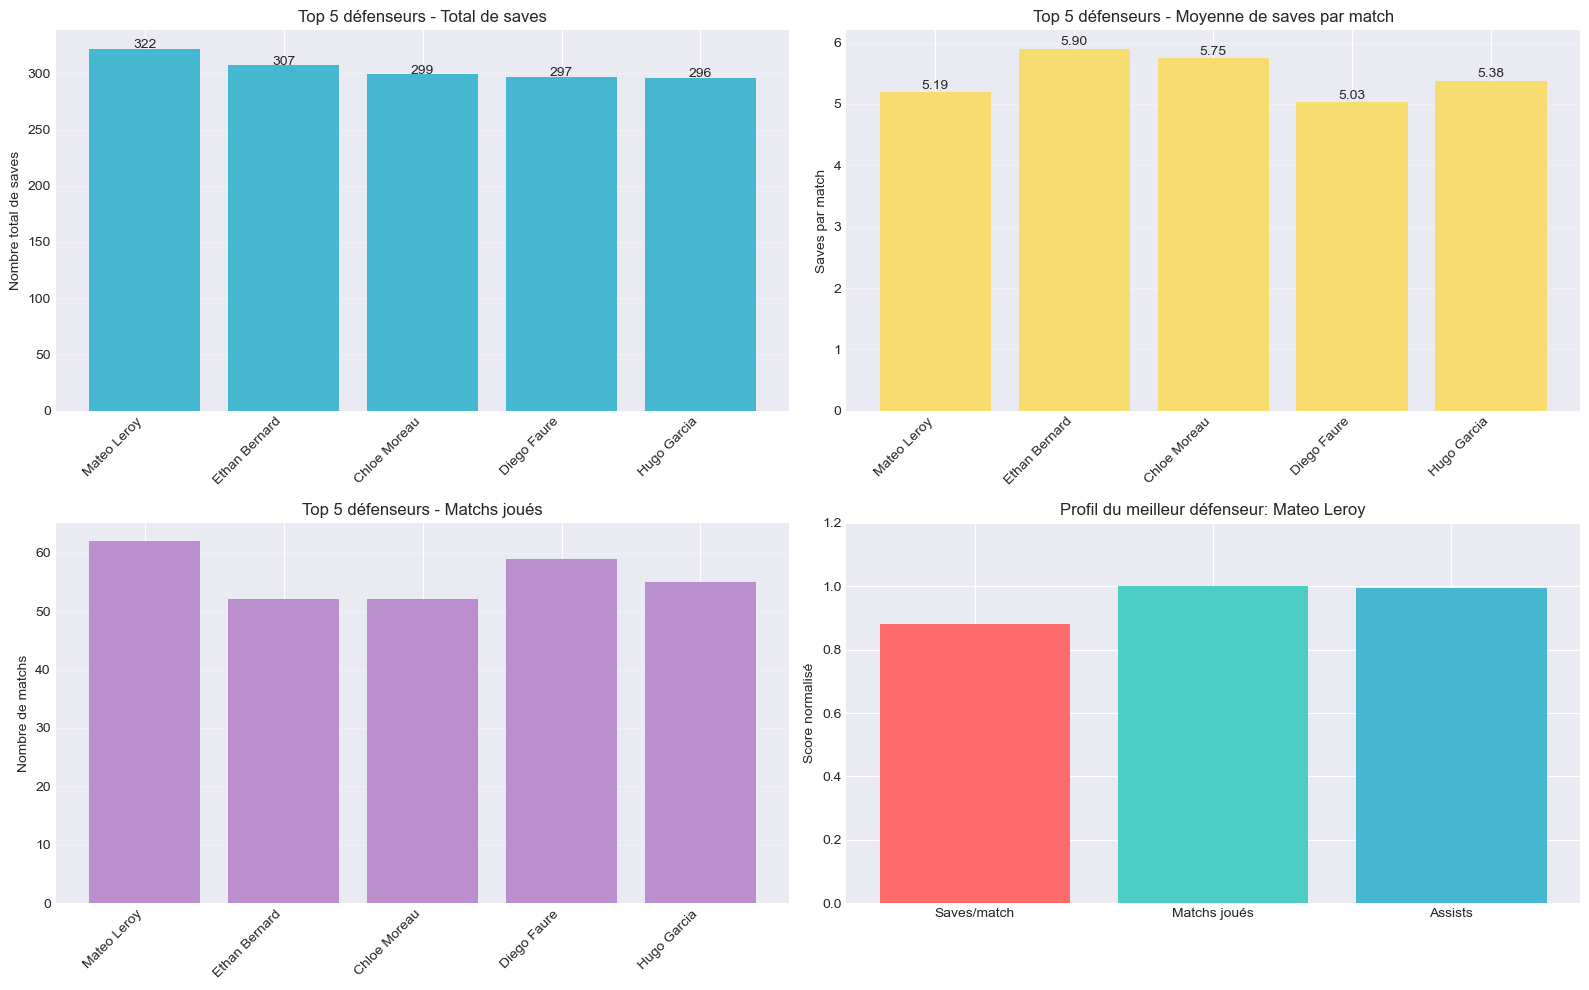


üìä D√©tail du Top 5 des d√©fenseurs:
--------------------------------------------------------------------------------
  player_name  matches_played  total_saves  saves_per_match  saves_per_90min  goals_scored  assists
  Mateo Leroy              62          322             5.19           106.15         146.0    145.0
Ethan Bernard              52          307             5.90           113.70         164.0    120.0
 Chloe Moreau              52          299             5.75           124.58         135.0    122.0
  Diego Faure              59          297             5.03            87.93         140.0    146.0
  Hugo Garcia              55          296             5.38            94.80         182.0    136.0

üìã Informations disponibles pour l'analyse des d√©fenseurs:
  ‚úì player_role (100200 valeurs non-nulles)
  ‚úì player_saves (100200 valeurs non-nulles)
  ‚úì player_name (100200 valeurs non-nulles)
  ‚úì game_duration_clean (100199 valeurs non-nulles)


In [84]:
# 4. TOP 5 DES D√âFENSEURS
print("\n\nüõ°Ô∏è 4. Analyse des meilleurs d√©fenseurs")
print("-"*40)

# V√©rifier quelle colonne de nom de joueur utiliser
name_col = 'player_name_clean' if 'player_name_clean' in df_clean.columns else 'player_name'

# V√©rifier si la colonne player_role existe
if 'player_role' not in df_clean.columns:
    print("‚ö†Ô∏è Colonne 'player_role' non trouv√©e - impossible de filtrer les d√©fenseurs")
    defenders = df_clean  # Utiliser tout le dataset
else:
    # Filtrer seulement les joueurs qui ont jou√© en d√©fense
    defenders = df_clean[df_clean['player_role'].str.lower().str.contains('def', na=False)]
    print(f"Nombre de lignes de d√©fenseurs trouv√©es: {len(defenders)}")

# Si aucun d√©fenseur trouv√©, utiliser tout le dataset
if len(defenders) == 0:
    print("‚ö†Ô∏è Aucun d√©fenseur identifi√© - analyse sur tous les joueurs")
    defenders = df_clean

# D√©terminer quelle colonne de dur√©e utiliser
duration_col = None
for col in ['game_duration_clean', 'game_duration', 'duration']:
    if col in defenders.columns:
        duration_col = col
        break

# Pr√©parer le dictionnaire d'agr√©gation
agg_dict = {
    'game_id': 'count',
    'player_saves': 'sum',
    'player_goals': 'sum',
    'player_assists': 'sum',
    'final_score_blue': 'sum',
    'final_score_red': 'sum'
}

# Ajouter la dur√©e si disponible
if duration_col:
    agg_dict[duration_col] = 'sum'

# V√©rifier que les colonnes existent avant l'agr√©gation
agg_dict_clean = {}
for col, func in agg_dict.items():
    if col in defenders.columns:
        agg_dict_clean[col] = func

# Grouper par joueur
groupby_cols = ['player_id']
if name_col in defenders.columns:
    groupby_cols.append(name_col)

# Agr√©gation des stats des d√©fenseurs
defender_stats = defenders.groupby(groupby_cols).agg(agg_dict_clean).reset_index()

# Renommer les colonnes en fonction de ce qui a √©t√© agr√©g√©
new_column_names = groupby_cols.copy()
if 'game_id' in agg_dict_clean:
    new_column_names.append('matches_played')
if 'player_saves' in agg_dict_clean:
    new_column_names.append('total_saves')
if 'player_goals' in agg_dict_clean:
    new_column_names.append('goals_scored')
if 'player_assists' in agg_dict_clean:
    new_column_names.append('assists')
if duration_col and duration_col in agg_dict_clean:
    new_column_names.append('total_minutes')
if 'final_score_blue' in agg_dict_clean:
    new_column_names.append('goals_against_blue')
if 'final_score_red' in agg_dict_clean:
    new_column_names.append('goals_against_red')

defender_stats.columns = new_column_names

# Si pas de colonne player_name, utiliser player_id
if 'player_name' not in defender_stats.columns:
    defender_stats['player_name'] = defender_stats['player_id']

# M√©triques d√©riv√©es pour les d√©fenseurs (avec v√©rifications)
if 'total_saves' in defender_stats.columns and 'matches_played' in defender_stats.columns:
    defender_stats['saves_per_match'] = defender_stats['total_saves'] / defender_stats['matches_played']
    defender_stats['saves_per_match'] = defender_stats['saves_per_match'].fillna(0)
else:
    defender_stats['saves_per_match'] = 0

if 'total_saves' in defender_stats.columns and 'total_minutes' in defender_stats.columns:
    defender_stats['saves_per_90min'] = defender_stats.apply(
        lambda x: (x['total_saves'] / x['total_minutes']) * 90 if x.get('total_minutes', 0) > 0 else 0, 
        axis=1
    )
else:
    defender_stats['saves_per_90min'] = 0

# Nettoyer les infinis et NaN
defender_stats = defender_stats.replace([np.inf, -np.inf], 0)
defender_stats = defender_stats.fillna(0)

# TOP 5 DES D√âFENSEURS
if 'total_saves' in defender_stats.columns and len(defender_stats) > 0:
    top_defenders = defender_stats.nlargest(5, 'total_saves')
    
    # S'assurer qu'on a au moins quelques d√©fenseurs avec des saves
    if len(top_defenders) > 0 and top_defenders['total_saves'].sum() > 0:
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        
        # Limiter au nombre r√©el de d√©fenseurs disponibles
        n_defenders = min(5, len(top_defenders))
        
        # Graphique 1: Total de saves
        ax1 = axes[0, 0]
        ax1.bar(range(n_defenders), top_defenders['total_saves'][:n_defenders], color='#45B7D1')
        ax1.set_xticks(range(n_defenders))
        ax1.set_xticklabels(top_defenders['player_name'][:n_defenders], rotation=45, ha='right')
        ax1.set_ylabel('Nombre total de saves')
        ax1.set_title(f'Top {n_defenders} d√©fenseurs - Total de saves')
        ax1.grid(True, alpha=0.3, axis='y')
        
        # Ajouter les valeurs
        for i, saves in enumerate(top_defenders['total_saves'][:n_defenders]):
            ax1.text(i, saves + 0.5, f'{int(saves)}', ha='center')
        
        # Graphique 2: Saves par match
        ax2 = axes[0, 1]
        ax2.bar(range(n_defenders), top_defenders['saves_per_match'][:n_defenders], color='#F7DC6F')
        ax2.set_xticks(range(n_defenders))
        ax2.set_xticklabels(top_defenders['player_name'][:n_defenders], rotation=45, ha='right')
        ax2.set_ylabel('Saves par match')
        ax2.set_title(f'Top {n_defenders} d√©fenseurs - Moyenne de saves par match')
        ax2.grid(True, alpha=0.3, axis='y')
        
        # Ajouter les valeurs
        for i, avg in enumerate(top_defenders['saves_per_match'][:n_defenders]):
            ax2.text(i, avg + 0.05, f'{avg:.2f}', ha='center')
        
        # Graphique 3: Nombre de matchs jou√©s
        ax3 = axes[1, 0]
        if 'matches_played' in top_defenders.columns:
            ax3.bar(range(n_defenders), top_defenders['matches_played'][:n_defenders], color='#BB8FCE')
            ax3.set_xticks(range(n_defenders))
            ax3.set_xticklabels(top_defenders['player_name'][:n_defenders], rotation=45, ha='right')
            ax3.set_ylabel('Nombre de matchs')
            ax3.set_title(f'Top {n_defenders} d√©fenseurs - Matchs jou√©s')
            ax3.grid(True, alpha=0.3, axis='y')
        
        # Graphique 4: Performance du meilleur d√©fenseur
        ax4 = axes[1, 1]
        if len(top_defenders) > 0:
            top_defender = top_defenders.iloc[0]
            
            # Cr√©er des m√©triques normalis√©es
            metrics = []
            values = []
            
            if 'saves_per_match' in top_defenders.columns and top_defenders['saves_per_match'].max() > 0:
                metrics.append('Saves/match')
                values.append(top_defender['saves_per_match'] / top_defenders['saves_per_match'].max())
            
            if 'matches_played' in top_defenders.columns and top_defenders['matches_played'].max() > 0:
                metrics.append('Matchs jou√©s')
                values.append(top_defender['matches_played'] / top_defenders['matches_played'].max())
            
            if 'assists' in top_defenders.columns and top_defenders['assists'].max() > 0:
                metrics.append('Assists')
                values.append(top_defender['assists'] / top_defenders['assists'].max())
            
            if len(metrics) > 0:
                ax4.bar(range(len(metrics)), values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'][:len(metrics)])
                ax4.set_xticks(range(len(metrics)))
                ax4.set_xticklabels(metrics)
                ax4.set_ylim(0, 1.2)
                ax4.set_title(f'Profil du meilleur d√©fenseur: {top_defender["player_name"]}')
                ax4.set_ylabel('Score normalis√©')
        
        plt.tight_layout()
        plt.show()
        
        # Tableau d√©taill√©
        print("\nüìä D√©tail du Top 5 des d√©fenseurs:")
        print("-"*80)
        
        # Colonnes √† afficher (seulement celles qui existent)
        display_cols = ['player_name', 'matches_played', 'total_saves', 'saves_per_match']
        available_cols = [col for col in display_cols if col in top_defenders.columns]
        
        if 'saves_per_90min' in top_defenders.columns and top_defenders['saves_per_90min'].sum() > 0:
            available_cols.append('saves_per_90min')
        if 'goals_scored' in top_defenders.columns:
            available_cols.append('goals_scored')
        if 'assists' in top_defenders.columns:
            available_cols.append('assists')
        
        print(top_defenders[available_cols].round(2).to_string(index=False))
    else:
        print("‚ö†Ô∏è Aucun d√©fenseur avec des saves trouv√©")
else:
    print("‚ö†Ô∏è Impossible de calculer les statistiques des d√©fenseurs - colonnes manquantes")

# Debug : afficher les informations disponibles
print("\nüìã Informations disponibles pour l'analyse des d√©fenseurs:")
for col in ['player_role', 'player_saves', 'player_name', 'player_name_clean', duration_col]:
    if col and col in df_clean.columns:
        non_null = df_clean[col].notna().sum()
        print(f"  ‚úì {col} ({non_null} valeurs non-nulles)")

## influence du camp choisi sur les r√©sultats



üî¥üîµ 5. Analyse : Le choix du camp influence-t-il le r√©sultat ?
------------------------------------------------------------

üìä R√©partition des victoires:
  Red: 11233 victoires (47.1%)
  Blue: 11027 victoires (46.3%)
  Draw: 1577 victoires (6.6%)

üî¨ Test statistique Chi-carr√©:
  Chi¬≤ = 1.9064
  p-value = 0.1674
  ‚ùå R√©sultat non significatif : Le camp NE SEMBLE PAS influencer le r√©sultat


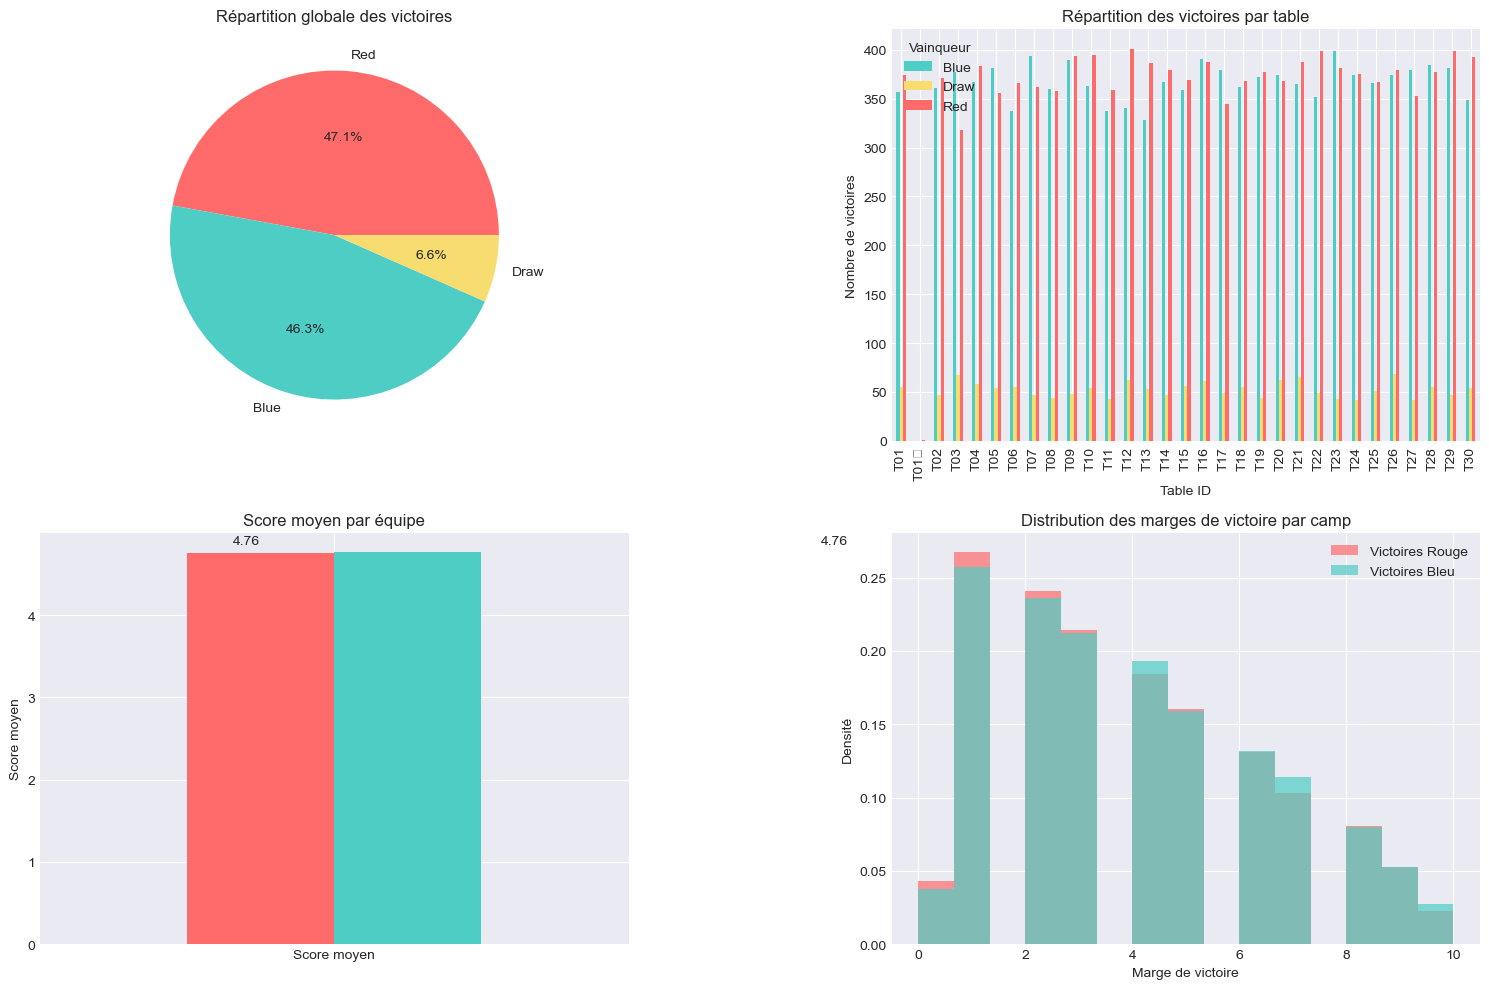


üìç Analyse par lieu de jeu:
winner_clean           Blue  Draw   Red
location                               
Bar Le Foos            45.5   7.4  47.1
Cafeteria (1st floor)  46.6   7.7  45.7
Campus - Cafeteria     46.2   6.8  47.0
Gym Hall               46.3   6.1  47.6
Lab 204                47.8   5.9  46.3
Salle Polyvalente      45.4   6.0  48.6
Student House          46.2   5.9  47.9
Ynov - B√¢timent A      47.7   6.8  45.6
Ynov Tls               44.7   6.9  48.4
Ynov Toulouse          46.2   6.6  47.2


In [85]:
# 5. ANALYSE DE L'INFLUENCE DU CAMP SUR LES R√âSULTATS
print("\n\nüî¥üîµ 5. Analyse : Le choix du camp influence-t-il le r√©sultat ?")
print("-"*60)

# Cr√©er un dataset au niveau des matchs (pas des joueurs)
match_results = df_clean.groupby('game_id').agg({
    'winner_clean': 'first',
    'final_score_red': 'first',
    'final_score_blue': 'first',
    'game_duration_clean': 'first',
    'location': 'first',
    'table_id': 'first'
}).reset_index()

# Calculer les statistiques par camp
camp_stats = match_results['winner_clean'].value_counts()
total_matches = len(match_results[match_results['winner_clean'].notna()])

print("\nüìä R√©partition des victoires:")
for camp, count in camp_stats.items():
    percentage = (count / total_matches) * 100
    print(f"  {camp}: {count} victoires ({percentage:.1f}%)")

# Test statistique (Chi-carr√©)
from scipy import stats

# Cr√©er une table de contingence
# H0: Le camp n'influence pas le r√©sultat (50-50 pour Rouge et Bleu)
victories_red = camp_stats.get('Red', 0)
victories_blue = camp_stats.get('Blue', 0)
draws = camp_stats.get('Draw', 0)

# Test pour Rouge vs Bleu uniquement (excluant les matchs nuls)
observed = [victories_red, victories_blue]
expected = [(victories_red + victories_blue) / 2, (victories_red + victories_blue) / 2]

chi2, p_value = stats.chisquare(observed, expected)

print(f"\nüî¨ Test statistique Chi-carr√©:")
print(f"  Chi¬≤ = {chi2:.4f}")
print(f"  p-value = {p_value:.4f}")

if p_value < 0.05:
    print("  ‚úÖ R√©sultat significatif : Le camp SEMBLE influencer le r√©sultat")
else:
    print("  ‚ùå R√©sultat non significatif : Le camp NE SEMBLE PAS influencer le r√©sultat")

# Visualisations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graphique 1: R√©partition des victoires
ax1 = axes[0, 0]
colors_pie = {'Red': '#FF6B6B', 'Blue': '#4ECDC4', 'Draw': '#F7DC6F'}
camp_stats.plot(kind='pie', ax=ax1, autopct='%1.1f%%', 
                colors=[colors_pie.get(x, '#888888') for x in camp_stats.index])
ax1.set_ylabel('')
ax1.set_title('R√©partition globale des victoires')

# Graphique 2: Victoires par table
ax2 = axes[0, 1]
table_victories = pd.crosstab(match_results['table_id'], match_results['winner_clean'])
table_victories.plot(kind='bar', ax=ax2, color=['#4ECDC4', '#F7DC6F', '#FF6B6B'])
ax2.set_xlabel('Table ID')
ax2.set_ylabel('Nombre de victoires')
ax2.set_title('R√©partition des victoires par table')
ax2.legend(title='Vainqueur')

# Graphique 3: Score moyen par camp
ax3 = axes[1, 0]
avg_scores = pd.DataFrame({
    'Rouge': [match_results['final_score_red'].mean()],
    'Bleu': [match_results['final_score_blue'].mean()]
})
avg_scores.plot(kind='bar', ax=ax3, color=['#FF6B6B', '#4ECDC4'], legend=False)
ax3.set_ylabel('Score moyen')
ax3.set_title('Score moyen par √©quipe')
ax3.set_xticklabels(['Score moyen'], rotation=0)

# Ajouter les valeurs
for i, (col, val) in enumerate(avg_scores.items()):
    ax3.text(i-0.15, val[0] + 0.1, f'{val[0]:.2f}', ha='center')

# Graphique 4: Distribution des marges de victoire par camp gagnant
ax4 = axes[1, 1]
red_wins = match_results[match_results['winner_clean'] == 'Red']['final_score_red'] - match_results[match_results['winner_clean'] == 'Red']['final_score_blue']
blue_wins = match_results[match_results['winner_clean'] == 'Blue']['final_score_blue'] - match_results[match_results['winner_clean'] == 'Blue']['final_score_red']

ax4.hist(red_wins, alpha=0.7, bins=15, color='#FF6B6B', label='Victoires Rouge', density=True)
ax4.hist(blue_wins, alpha=0.7, bins=15, color='#4ECDC4', label='Victoires Bleu', density=True)
ax4.set_xlabel('Marge de victoire')
ax4.set_ylabel('Densit√©')
ax4.set_title('Distribution des marges de victoire par camp')
ax4.legend()

plt.tight_layout()
plt.show()

# Analyse compl√©mentaire : par location
print("\nüìç Analyse par lieu de jeu:")
location_analysis = pd.crosstab(match_results['location'], match_results['winner_clean'], normalize='index') * 100
print(location_analysis.round(1).head(10))

## heures de pointe et d'utilisation des tables 

In [29]:
# 6. ANALYSE DES HEURES DE POINTE ET UTILISATION DES TABLES
print("\n\nüïê 6. Analyse des heures de pointe et utilisation des babyfoots")
print("-"*60)

# Utilisation des tables
table_usage = df_clean.groupby('table_id').agg({
    'game_id': 'nunique',
    'game_duration_clean': 'sum',
    'player_id': 'count'
}).reset_index()

table_usage.columns = ['table_id', 'nb_matchs', 'temps_total_utilisation', 'nb_joueurs_total']
table_usage['temps_moyen_par_match'] = table_usage['temps_total_utilisation'] / table_usage['nb_matchs']
table_usage = table_usage.sort_values('nb_matchs', ascending=False)

# Top 10 des tables les plus utilis√©es
top_tables = table_usage.head(10)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Graphique 1: Tables les plus utilis√©es (nombre de matchs)
ax1 = axes[0, 0]
ax1.bar(range(10), top_tables['nb_matchs'], color='#45B7D1')
ax1.set_xticks(range(10))
ax1.set_xticklabels(top_tables['table_id'], rotation=45)
ax1.set_ylabel('Nombre de matchs')
ax1.set_title('Top 10 des babyfoots les plus utilis√©s')
ax1.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs
for i, val in enumerate(top_tables['nb_matchs']):
    ax1.text(i, val + 5, f'{val}', ha='center')

# Graphique 2: Temps d'utilisation total
ax2 = axes[0, 1]
ax2.bar(range(10), top_tables['temps_total_utilisation'], color='#F7DC6F')
ax2.set_xticks(range(10))
ax2.set_xticklabels(top_tables['table_id'], rotation=45)
ax2.set_ylabel('Temps total (minutes)')
ax2.set_title('Temps total d\'utilisation par table')
ax2.grid(True, alpha=0.3, axis='y')

# Graphique 3: Heatmap des heures de jeu par jour
ax3 = axes[1, 0]

# Cr√©er une matrice jour x heure si on a des donn√©es horaires
if df_clean['game_hour'].notna().sum() > 0:
    # Compter les matchs par jour et heure
    heatmap_data = df_clean.groupby(['game_day_of_week', 'game_hour'])['game_id'].nunique().reset_index()
    heatmap_pivot = heatmap_data.pivot(index='game_day_of_week', columns='game_hour', values='game_id').fillna(0)
    
    # Cr√©er la heatmap
    im = ax3.imshow(heatmap_pivot, cmap='YlOrRd', aspect='auto')
    
    # Labels
    ax3.set_yticks(range(7))
    ax3.set_yticklabels(['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim'])
    ax3.set_xlabel('Heure de la journ√©e')
    ax3.set_title('Heatmap: Intensit√© d\'utilisation par jour et heure')
    
    # Colorbar
    cbar = plt.colorbar(im, ax=ax3)
    cbar.set_label('Nombre de matchs')
else:
    ax3.text(0.5, 0.5, 'Pas de donn√©es horaires pour la heatmap', 
             ha='center', va='center', transform=ax3.transAxes)
    ax3.set_xticks([])
    ax3.set_yticks([])

# Graphique 4: √âtat des tables vs utilisation
ax4 = axes[1, 1]

# Analyser l'√©tat des tables
table_condition_usage = df_clean.groupby('table_condition')['game_id'].nunique()
condition_colors = {
    'new': '#2ECC71',
    'good': '#3498DB', 
    'worn': '#F39C12',
    'scratched': '#E67E22',
    'broken': '#E74C3C',
    'broken leg': '#C0392B',
    'missing screw': '#D35400',
    'out of alignment': '#A93226',
    'beer stains': '#F1C40F'
}

sorted_conditions = table_condition_usage.sort_values(ascending=True)
colors_list = [condition_colors.get(cond, '#95A5A6') for cond in sorted_conditions.index]

ax4.barh(range(len(sorted_conditions)), sorted_conditions.values, color=colors_list)
ax4.set_yticks(range(len(sorted_conditions)))
ax4.set_yticklabels(sorted_conditions.index)
ax4.set_xlabel('Nombre de matchs')
ax4.set_title('Utilisation selon l\'√©tat des tables')
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Statistiques cl√©s pour le business
print("\nüìä INSIGHTS BUSINESS CL√âS:")
print("-"*40)

print("\n1. UTILISATION DES TABLES:")
print(f"   - Table la plus utilis√©e: {top_tables.iloc[0]['table_id']} ({top_tables.iloc[0]['nb_matchs']} matchs)")
print(f"   - Temps moyen par match: {table_usage['temps_moyen_par_match'].mean():.1f} minutes")

print("\n2. HEURES DE POINTE:")
if df_clean['game_hour'].notna().sum() > 0:
    hourly_activity = df_clean.groupby('game_hour')['game_id'].nunique()
    peak_hour = hourly_activity.idxmax()
    print(f"   - Heure la plus active: {peak_hour}h ({hourly_activity.max()} matchs)")
    print(f"   - P√©riode creuse: {hourly_activity.idxmin()}h ({hourly_activity.min()} matchs)")

print("\n3. MAINTENANCE RECOMMAND√âE:")
poor_condition = ['broken', 'broken leg', 'missing screw', 'out of alignment']
tables_need_maintenance = df_clean[df_clean['table_condition'].isin(poor_condition)]['table_id'].unique()
print(f"   - Tables n√©cessitant maintenance: {', '.join(tables_need_maintenance[:5])}")

print("\n4. ENGAGEMENT DES JOUEURS:")
regular_players = player_stats[player_stats['matches_played'] >= 10]
print(f"   - Joueurs r√©guliers (10+ matchs): {len(regular_players)}")
print(f"   - Taux de joueurs r√©guliers: {len(regular_players)/len(player_stats)*100:.1f}%")



üïê 6. Analyse des heures de pointe et utilisation des babyfoots
------------------------------------------------------------



üìä INSIGHTS BUSINESS CL√âS:
----------------------------------------

1. UTILISATION DES TABLES:
   - Table la plus utilis√©e: T16 (882 matchs)
   - Temps moyen par match: 66.6 minutes

2. HEURES DE POINTE:
   - Heure la plus active: 10.0h (25002 matchs)
   - P√©riode creuse: 10.0h (25002 matchs)

3. MAINTENANCE RECOMMAND√âE:
   - Tables n√©cessitant maintenance: T26, T20, T03, T22, T08

4. ENGAGEMENT DES JOUEURS:
   - Joueurs r√©guliers (10+ matchs): 3627
   - Taux de joueurs r√©guliers: 65.7%


## Analyse bivari√©√©



üìä 7. ANALYSES BIVARI√âES - CORR√âLATIONS ENTRE VARIABLES
Colonnes num√©riques disponibles pour l'analyse: 14


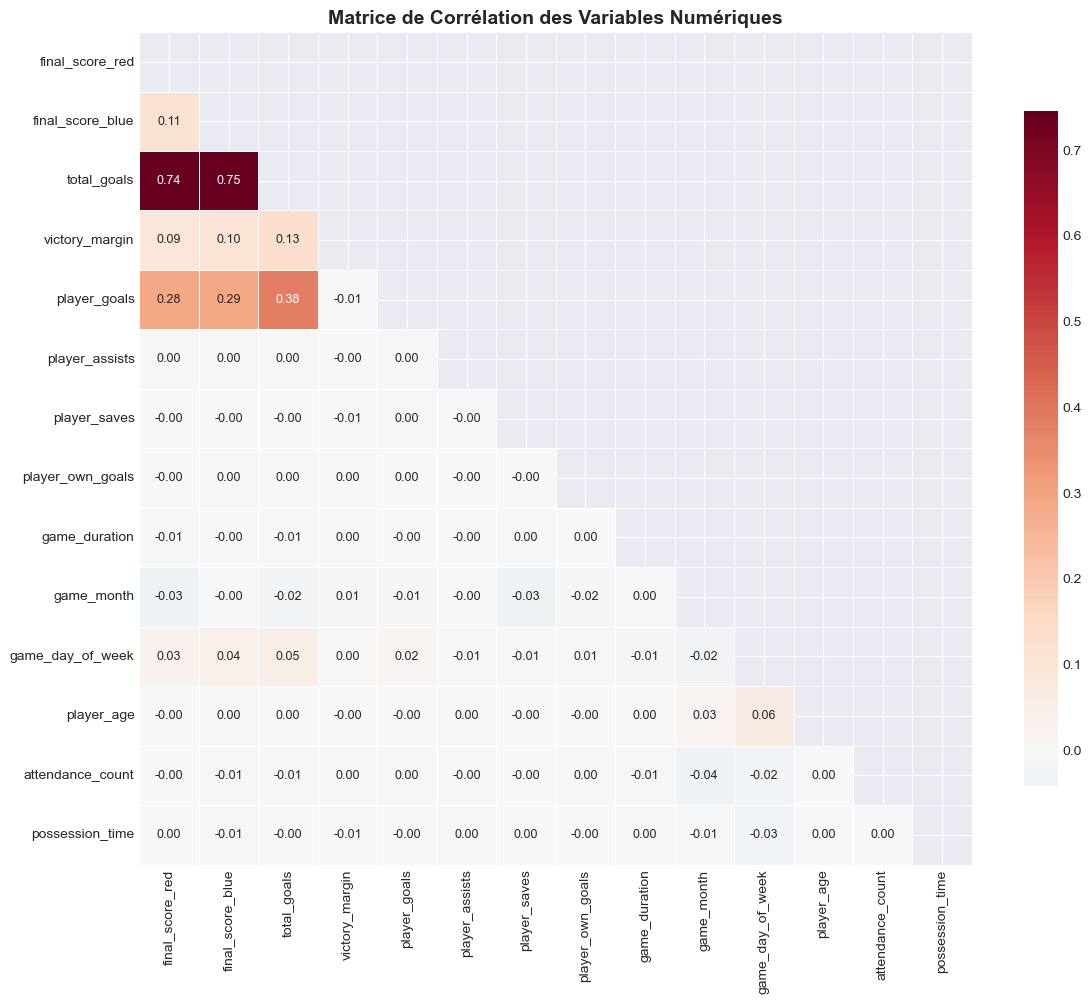

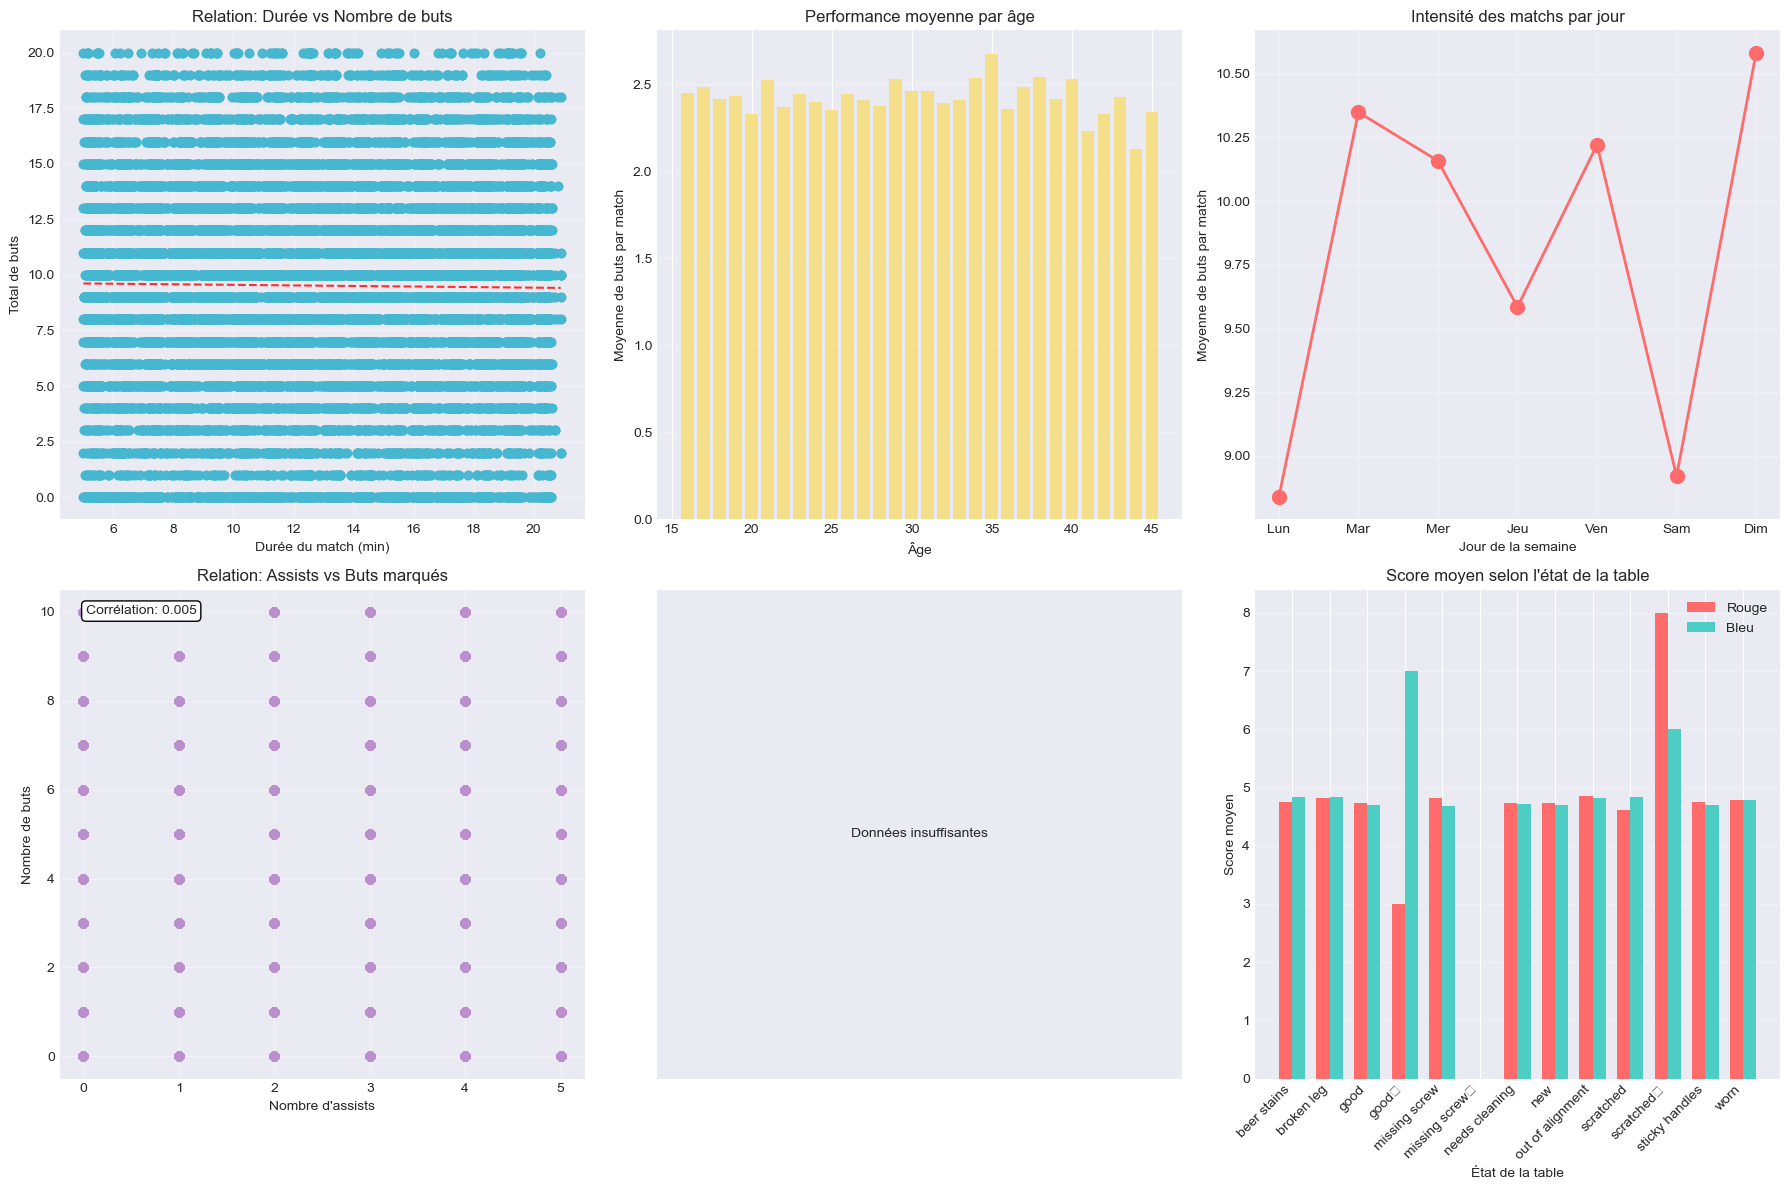


üìà CORR√âLATIONS LES PLUS SIGNIFICATIVES:
--------------------------------------------------
  ‚ÜóÔ∏è final_score_blue ‚ü∑ total_goals: 0.746
  ‚ÜóÔ∏è final_score_red ‚ü∑ total_goals: 0.743
  ‚ÜóÔ∏è total_goals ‚ü∑ player_goals: 0.384

üí° INSIGHTS BUSINESS DES ANALYSES BIVARI√âES:
--------------------------------------------------
  ‚Ä¢ Corr√©lation buts/dur√©e: -0.008
  ‚Ä¢ Corr√©lation √¢ge/performance: -0.003
    ‚Üí √Çge optimal pour marquer: 35 ans


In [59]:
# 7. ANALYSES BIVARI√âES ET CORR√âLATIONS
print("\n\nüìä 7. ANALYSES BIVARI√âES - CORR√âLATIONS ENTRE VARIABLES")
print("="*60)

# Pr√©parer les donn√©es pour l'analyse des corr√©lations
# S√©lectionner uniquement les colonnes num√©riques pertinentes
numeric_cols = []
potential_cols = [
    'final_score_red', 'final_score_blue', 'total_goals', 'victory_margin',
    'player_goals', 'player_assists', 'player_saves', 'player_own_goals',
    'game_duration', 'game_month', 'game_day_of_week', 'game_hour',
    'player_age', 'attendance_count', 'possession_time'
]

# V√©rifier quelles colonnes existent et sont num√©riques
for col in potential_cols:
    if col in df_clean.columns:
        # Convertir en num√©rique si n√©cessaire
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        if df_clean[col].notna().sum() > 10:  # Au moins 10 valeurs non-nulles
            numeric_cols.append(col)

print(f"Colonnes num√©riques disponibles pour l'analyse: {len(numeric_cols)}")

if len(numeric_cols) >= 2:
    # 1. MATRICE DE CORR√âLATION
    plt.figure(figsize=(12, 10))
    correlation_matrix = df_clean[numeric_cols].corr()
    
    # Heatmap des corr√©lations
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, cmap='RdBu_r', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
                annot=True, fmt='.2f', annot_kws={'size': 9})
    plt.title('Matrice de Corr√©lation des Variables Num√©riques', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # 2. ANALYSES BIVARI√âES SP√âCIFIQUES
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    # Analyse 1: Score vs Dur√©e du match
    ax1 = axes[0]
    if 'total_goals' in df_clean.columns and 'game_duration' in df_clean.columns:
        valid_data = df_clean[['total_goals', 'game_duration']].dropna()
        if len(valid_data) > 10:
            ax1.scatter(valid_data['game_duration'], valid_data['total_goals'], 
                       alpha=0.5, color='#45B7D1')
            z = np.polyfit(valid_data['game_duration'], valid_data['total_goals'], 1)
            p = np.poly1d(z)
            ax1.plot(valid_data['game_duration'].sort_values(), 
                    p(valid_data['game_duration'].sort_values()), 
                    "r--", alpha=0.8)
            ax1.set_xlabel('Dur√©e du match (min)')
            ax1.set_ylabel('Total de buts')
            ax1.set_title('Relation: Dur√©e vs Nombre de buts')
            ax1.grid(True, alpha=0.3)
    
    # Analyse 2: Performance par √¢ge
    ax2 = axes[1]
    if 'player_age' in df_clean.columns and 'player_goals' in df_clean.columns:
        age_performance = df_clean.groupby('player_age').agg({
            'player_goals': 'mean',
            'player_id': 'count'
        }).reset_index()
        age_performance = age_performance[age_performance['player_id'] >= 5]  # Au moins 5 joueurs
        
        if len(age_performance) > 0:
            ax2.bar(age_performance['player_age'], age_performance['player_goals'], 
                   color='#F7DC6F', alpha=0.8)
            ax2.set_xlabel('√Çge')
            ax2.set_ylabel('Moyenne de buts par match')
            ax2.set_title('Performance moyenne par √¢ge')
            ax2.grid(True, alpha=0.3, axis='y')
    
    # Analyse 3: Jour de la semaine vs Score total
    ax3 = axes[2]
    if 'game_day_of_week' in df_clean.columns and 'total_goals' in df_clean.columns:
        daily_scores = df_clean.groupby('game_day_of_week')['total_goals'].mean()
        days_labels = ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
        
        if len(daily_scores) > 0:
            ax3.plot(daily_scores.index, daily_scores.values, 
                    marker='o', color='#FF6B6B', markersize=10, linewidth=2)
            ax3.set_xticks(range(7))
            ax3.set_xticklabels([days_labels[int(i)] for i in daily_scores.index if i < 7])
            ax3.set_xlabel('Jour de la semaine')
            ax3.set_ylabel('Moyenne de buts par match')
            ax3.set_title('Intensit√© des matchs par jour')
            ax3.grid(True, alpha=0.3)
    
    # Analyse 4: Relation Buts vs Assists
    ax4 = axes[3]
    if 'player_goals' in df_clean.columns and 'player_assists' in df_clean.columns:
        valid_data = df_clean[['player_goals', 'player_assists']].dropna()
        if len(valid_data) > 10:
            ax4.scatter(valid_data['player_assists'], valid_data['player_goals'], 
                       alpha=0.3, color='#BB8FCE')
            ax4.set_xlabel('Nombre d\'assists')
            ax4.set_ylabel('Nombre de buts')
            ax4.set_title('Relation: Assists vs Buts marqu√©s')
            ax4.grid(True, alpha=0.3)
            
            # Ajouter la corr√©lation
            corr = valid_data['player_goals'].corr(valid_data['player_assists'])
            ax4.text(0.05, 0.95, f'Corr√©lation: {corr:.3f}', 
                    transform=ax4.transAxes, bbox=dict(boxstyle='round', facecolor='white'))
    
    # Analyse 5: Heure du jour vs Dur√©e des matchs
    ax5 = axes[4]
    if 'game_hour' in df_clean.columns and 'game_duration' in df_clean.columns:
        hourly_duration = df_clean.groupby('game_hour')['game_duration'].mean()
        
        if len(hourly_duration) > 0:
            ax5.bar(hourly_duration.index, hourly_duration.values, 
                   color='#2ECC71', alpha=0.8)
            ax5.set_xlabel('Heure de la journ√©e')
            ax5.set_ylabel('Dur√©e moyenne (min)')
            ax5.set_title('Dur√©e des matchs selon l\'heure')
            ax5.grid(True, alpha=0.3, axis='y')
    
    # Analyse 6: Score par √©quipe selon l'√©tat de la table
    ax6 = axes[5]
    if 'table_condition' in df_clean.columns:
        condition_scores = df_clean.groupby('table_condition').agg({
            'final_score_red': 'mean',
            'final_score_blue': 'mean'
        }).reset_index()
        
        if len(condition_scores) > 0:
            x = np.arange(len(condition_scores))
            width = 0.35
            
            ax6.bar(x - width/2, condition_scores['final_score_red'], 
                   width, label='Rouge', color='#FF6B6B')
            ax6.bar(x + width/2, condition_scores['final_score_blue'], 
                   width, label='Bleu', color='#4ECDC4')
            
            ax6.set_xlabel('√âtat de la table')
            ax6.set_ylabel('Score moyen')
            ax6.set_title('Score moyen selon l\'√©tat de la table')
            ax6.set_xticks(x)
            ax6.set_xticklabels(condition_scores['table_condition'], rotation=45, ha='right')
            ax6.legend()
            ax6.grid(True, alpha=0.3, axis='y')
    
    # Ajuster l'espacement
    for i, ax in enumerate(axes):
        if not ax.has_data():
            ax.text(0.5, 0.5, 'Donn√©es insuffisantes', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_xticks([])
            ax.set_yticks([])
    
    plt.tight_layout()
    plt.show()
    
    # 3. CORR√âLATIONS LES PLUS SIGNIFICATIVES
    print("\nüìà CORR√âLATIONS LES PLUS SIGNIFICATIVES:")
    print("-"*50)
    
    # Extraire les corr√©lations fortes (> 0.3 ou < -0.3)
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.3 and not np.isnan(corr_value):
                strong_corr.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Corr√©lation': corr_value
                })
    
    if strong_corr:
        strong_corr_df = pd.DataFrame(strong_corr)
        strong_corr_df = strong_corr_df.sort_values('Corr√©lation', key=abs, ascending=False)
        
        for _, row in strong_corr_df.iterrows():
            if row['Corr√©lation'] > 0:
                print(f"  ‚ÜóÔ∏è {row['Variable 1']} ‚ü∑ {row['Variable 2']}: {row['Corr√©lation']:.3f}")
            else:
                print(f"  ‚ÜòÔ∏è {row['Variable 1']} ‚ü∑ {row['Variable 2']}: {row['Corr√©lation']:.3f}")
    else:
        print("  Aucune corr√©lation forte d√©tect√©e (|r| > 0.3)")
    
    # 4. INSIGHTS BUSINESS DES CORR√âLATIONS
    print("\nüí° INSIGHTS BUSINESS DES ANALYSES BIVARI√âES:")
    print("-"*50)
    
    if 'total_goals' in df_clean.columns and 'game_duration' in df_clean.columns:
        corr_goals_duration = df_clean[['total_goals', 'game_duration']].corr().iloc[0, 1]
        if not np.isnan(corr_goals_duration):
            print(f"  ‚Ä¢ Corr√©lation buts/dur√©e: {corr_goals_duration:.3f}")
            if corr_goals_duration > 0.3:
                print("    ‚Üí Les matchs plus longs ont tendance √† avoir plus de buts")
            elif corr_goals_duration < -0.3:
                print("    ‚Üí Les matchs courts sont souvent plus intenses")
    
    if 'player_age' in df_clean.columns and 'player_goals' in df_clean.columns:
        age_goal_corr = df_clean[['player_age', 'player_goals']].corr().iloc[0, 1]
        if not np.isnan(age_goal_corr):
            print(f"  ‚Ä¢ Corr√©lation √¢ge/performance: {age_goal_corr:.3f}")
            optimal_age = df_clean.groupby('player_age')['player_goals'].mean().idxmax()
            print(f"    ‚Üí √Çge optimal pour marquer: {int(optimal_age)} ans")
else:
    print("‚ö†Ô∏è Pas assez de colonnes num√©riques pour l'analyse des corr√©lations")